In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.dates import date2num
import matplotlib.dates as mdates
from datetime import datetime
import xarray as xr
import netCDF4 as nc
import pandas as pd
import glob
import math
import subprocess
from matplotlib import colormaps

from matplotlib.colors import ListedColormap
import plotly.graph_objs as go

import cartopy.crs as ccrs
import cartopy.feature as cfeature



/home/b/b382718/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Keys inside 'ScienceData' group: ['Data', 'Geo']
Keys inside 'ScienceData/Data' group: ['binStatusFlag', 'covarianceCoeff', 'dopplerStatusFlag', 'dopplerVelocity', 'dopplerVelocityAtSurfaceBin', 'integrationNumberDoppler', 'integrationNumberEcho', 'noiseFloorPower', 'operationalMode', 'pulseShapeWarnFlag', 'pulseWidth', 'radarCoefficient', 'radarReflectivityFactor', 'rangeBinValidNumber', 'rayHeaderCalVers', 'rayHeaderLambda', 'rayQualityFlag', 'rayStatusFlag', 'rayStatusPrf', 'receivedEchoPower', 'satelliteVelocityContaminationInLOS', 'sigmaZero', 'spectrumWidth', 'subOperationalMode', 'surfaceBinFraction', 'surfaceBinNumber', 'surfaceEstimationFlag', 'transmitPower', 'transmitPowerAvg', 'txRxStatusFlag']

Keys inside 'ScienceData/Data' group: ['binHeight', 'latitude', 'longitude', 'navigationLandWaterFlg', 'pitchAngle', 'processingFrameNo', 'profileTime', 'rangeBinMaxNumber', 'rangeToFirstBin', 'rangeToIntercept', 'rayHeaderRangeBinSize', 'rayHeaderSpatAvg', 'rayNumber', 'rollAngle',

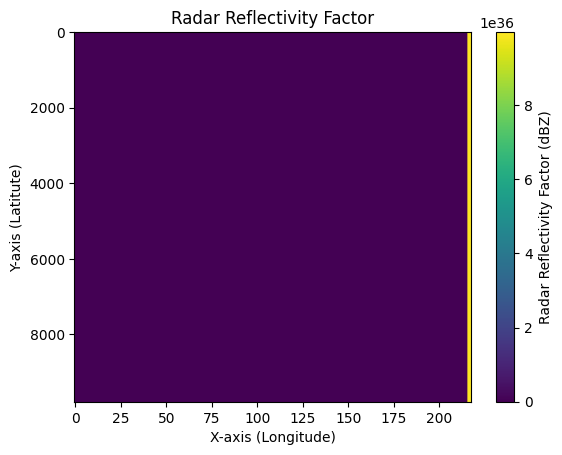

In [47]:

import h5py

file = '/work/bk1415/b382718/output/orcestra/observations/earthcare/radar/ECA_JXCA_CPR_NOM_1B_20240903T143251Z_20250207T020922Z_01519E.h5'
with h5py.File(file, 'r') as f:
    # List the groups/datasets inside the 'ScienceData' group
    science_data_group = f['ScienceData']
    print("Keys inside 'ScienceData' group:", list(science_data_group.keys()))

    data_group = science_data_group['Data']
    print("Keys inside 'ScienceData/Data' group:", list(data_group.keys()))
    refl_ec = data_group['radarReflectivityFactor']
    refl_fact_ec = refl_ec[:]
    print()
    geo_group = science_data_group['Geo']
    lon_ec = geo_group['longitude']
    lat_ec = geo_group['latitude']
    print("Keys inside 'ScienceData/Data' group:", list(geo_group.keys()))
    

    # Access a specific dataset inside 'ScienceData'
    #dataset_1 = science_data_group['Data']  
    #dataset_2 = science_data_group['Geo']  
    
    #print(dataset_1)
    #print(dataset_2)

print(refl_fact_ec)

plt.imshow(refl_fact_ec, cmap='viridis', aspect='auto')
plt.colorbar(label="Radar Reflectivity Factor (dBZ)")  # Assuming the data is in dBZ
plt.title("Radar Reflectivity Factor")
plt.xlabel("X-axis (Longitude)")
plt.ylabel("Y-axis (Latitute)")
plt.show()

In [ ]:

ds_1mom = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/orcestra_1mom/NWP_LAM_icongrid_DOM04_202409*.nc');

ds_nosip = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/orcestra_2mom_nosip/NWP_LAM_icongrid_DOM04_202409*.nc');

ds_sip = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/orcestra_2mom_sip/old_output/NWP_LAM_icongrid_DOM04_202409*.nc');


In [3]:

ds_nosip_effrad = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/orcestra_2mom_nosip_effrad/NWP_LAM_icongrid_DOM04_202409*.nc');


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [21]:

ds_sip_lim_vt_sg = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/lim_vt_sg/orcestra_2mom_sip/NWP_LAM_icongrid_DOM04_202409*.nc');


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [22]:

grid_orc = xr.open_mfdataset('/work/bk1415/b382718/output/orcestra/nested_run/icon_output/marine_ccn/light_param/SIP/orcestra_1mom/domain4_DOM04.nc');


In [23]:

ds_sip['w_vel'] = -1.*ds_sip.omega/(9.8*ds_sip.rho)
ds_sip['tempc'] = ds_sip.temp-273.16;
ds_sip['lwc_gperm3']  = ds_sip.qc*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['ciwc_gperm3'] = ds_sip.qi*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['tiwc_gperm3'] = (ds_sip.qi+ds_sip.qs+ds_sip.qg+ds_sip.qh)*ds_sip.rho*1.e3 # kgperm3 to gperm3
ds_sip['cdnc_percm3'] = ds_sip.qnc*ds_sip.rho*1.e-6  # perkg to percm3
ds_sip['inc_perl'] = (ds_sip.qni+ds_sip.qns+ds_sip.qng+ds_sip.qnh)*ds_sip.rho*1.e-3 # perkg to perl

ds_nosip['w_vel'] = -1.*ds_nosip.omega/(9.8*ds_nosip.rho)
ds_nosip['tempc'] = ds_nosip.temp-273.16;
ds_nosip['lwc_gperm3']  = ds_nosip.qc*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['ciwc_gperm3'] = ds_nosip.qi*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['tiwc_gperm3'] = (ds_nosip.qi+ds_nosip.qs+ds_nosip.qg+ds_nosip.qh)*ds_nosip.rho*1.e3 # kgperm3 to gperm3
ds_nosip['cdnc_percm3'] = ds_nosip.qnc*ds_nosip.rho*1.e-6  # perkg to percm3
ds_nosip['inc_perl'] = (ds_nosip.qni+ds_nosip.qns+ds_nosip.qng+ds_nosip.qnh)*ds_nosip.rho*1.e-3 # perkg to perl

ds_sip_lim_vt_sg['w_vel'] = -1.*ds_sip_lim_vt_sg.omega/(9.8*ds_sip_lim_vt_sg.rho)
ds_sip_lim_vt_sg['tempc'] = ds_sip_lim_vt_sg.temp-273.16;
ds_sip_lim_vt_sg['lwc_gperm3']  = ds_sip_lim_vt_sg.qc*ds_sip_lim_vt_sg.rho*1.e3 # kgperm3 to gperm3
ds_sip_lim_vt_sg['ciwc_gperm3'] = ds_sip_lim_vt_sg.qi*ds_sip_lim_vt_sg.rho*1.e3 # kgperm3 to gperm3
ds_sip_lim_vt_sg['tiwc_gperm3'] = (ds_sip_lim_vt_sg.qi+ds_sip_lim_vt_sg.qs+ds_sip_lim_vt_sg.qg+ds_sip_lim_vt_sg.qh)*ds_sip_lim_vt_sg.rho*1.e3 # kgperm3 to gperm3
ds_sip_lim_vt_sg['cdnc_percm3'] = ds_sip_lim_vt_sg.qnc*ds_sip_lim_vt_sg.rho*1.e-6  # perkg to percm3
ds_sip_lim_vt_sg['inc_perl'] = (ds_sip_lim_vt_sg.qni+ds_sip_lim_vt_sg.qns+ds_sip_lim_vt_sg.qng+ds_sip_lim_vt_sg.qnh)*ds_sip_lim_vt_sg.rho*1.e-3 # perkg to perl


In [24]:


clon_deg = np.degrees(grid_orc.clon)
clat_deg = np.degrees(grid_orc.clat)

print(clon_deg.min().values); print(clon_deg.max().values);
print(clat_deg.min().values); print(clat_deg.max().values);

okla_x, okla_y = np.array([-30., 9.])
#print(okla_x), print(okla_y)
dx_deg = 2.; dy_deg = 2.0
left_bound = okla_x - dx_deg
right_bound = okla_x + dx_deg
top_bound = okla_y + dy_deg
bottom_bound = okla_y - dy_deg

print(left_bound), print(right_bound)
print(top_bound), print(bottom_bound)

-32.03759442634206
-27.96236307373933
6.967468001138239
11.031985309167817
-32.0
-28.0
11.0
7.0


(None, None)

In [25]:

window_cell = (
    (grid_orc.clat >= np.deg2rad(bottom_bound))
    & (grid_orc.clat <= np.deg2rad(top_bound))
    & (grid_orc.clon >= np.deg2rad(left_bound))
    & (grid_orc.clon <= np.deg2rad(right_bound))
).values

(window_cell_indices,) = np.where(window_cell)


# select cells matching with the area of interest (windows_cell_indices:: matching to that with the area sampled by the aircraft)
window_vertex_indices = (np.unique(grid_orc.vertex_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_vertex_indices ::',window_vertex_indices)

# select edges matching with the area of interest (corresponding to the windows_cell_indices)
window_edge_indices = (np.unique(grid_orc.edge_of_cell.isel(cell=window_cell_indices).values) - 1)
print('window_edge_indices ::',window_edge_indices)

selected_indices = xr.Dataset(
    {
        "cell": ("cell", window_cell_indices),
        "vertex": ("vertex", window_vertex_indices),
        "edge": ("edge", window_edge_indices),
    }
)

vars_to_renumber = {
    "cell": [
        "adjacent_cell_of_edge",
        "cells_of_vertex",
        "neighbor_cell_index",
    ],
    "vertex": ["vertex_of_cell", "edge_vertices", "vertices_of_vertex"],
    "edge": ["edge_of_cell", "edges_of_vertex"],
}


def reindex_grid(grid, indices, vars_to_renumber):
    new_grid = grid.load().isel(
        cell=indices.cell, vertex=indices.vertex, edge=indices.edge
    )
    for dim, idx in indices.coords.items():
        renumbering = np.full(grid.dims[dim], -2, dtype="int")
        renumbering[idx] = np.arange(len(idx))
        for name in vars_to_renumber[dim]:
            new_grid[name].data = renumbering[new_grid[name].data - 1] + 1
    return new_grid



window_vertex_indices :: [    4     7    15 ... 37370 37371 37372]
window_edge_indices :: [    63     64     65 ... 111329 111330 111331]


In [26]:

new_grid_orc = reindex_grid(grid_orc, selected_indices, vars_to_renumber)
mask=np.isin(ds_sip['ncells'], selected_indices.cell)

ds_sip_new = ds_sip.sel(ncells=mask)
ds_nosip_new = ds_nosip.sel(ncells=mask)
ds_1mom_new = ds_1mom.sel(ncells=mask)
ds_sip_vtsg_new = ds_sip_lim_vt_sg.sel(ncells=mask)


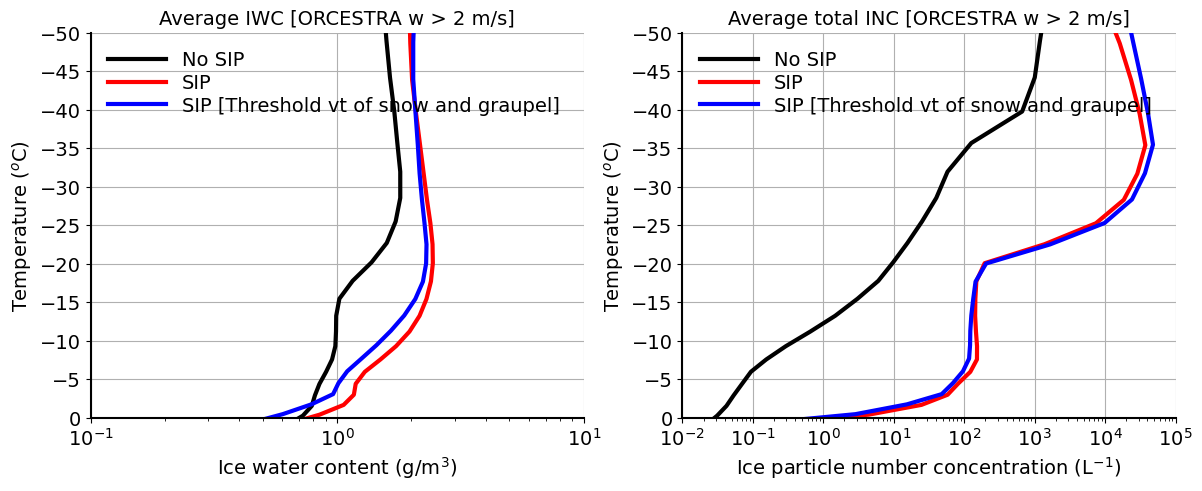

In [27]:


filt_tiwc_nosip = xr.where((ds_nosip_new.tiwc_gperm3 > 1.e-6) & (ds_nosip_new.w_vel > 2.), ds_nosip_new.tiwc_gperm3, np.nan)
filt_inc_nosip = xr.where((ds_nosip_new.inc_perl > 1.e-3) & (ds_nosip_new.w_vel > 2.), ds_nosip_new.inc_perl, np.nan)

filt_tiwc_sip = xr.where((ds_sip_new.tiwc_gperm3 > 1.e-6) & (ds_sip_new.w_vel > 2.), ds_sip_new.tiwc_gperm3, np.nan)
filt_inc_sip = xr.where((ds_sip_new.inc_perl > 1.e-3) & (ds_sip_new.w_vel > 2.), ds_sip_new.inc_perl, np.nan)

filt_tiwc_sip_vt_sg = xr.where((ds_sip_vtsg_new.tiwc_gperm3 > 1.e-6) & (ds_sip_vtsg_new.w_vel > 2.), ds_sip_vtsg_new.tiwc_gperm3, np.nan)
filt_inc_sip_vt_sg = xr.where((ds_sip_vtsg_new.inc_perl > 1.e-3) & (ds_sip_vtsg_new.w_vel > 2.), ds_sip_vtsg_new.inc_perl, np.nan)


# Plotting
plt.figure(figsize=(14, 5))
deg_faint_errbar = 0.6
lnwdth=3
fontsize=14
plt.subplot(1,2,1)
plt.plot(filt_tiwc_nosip.mean(dim=('time','ncells')), ds_nosip_new.tempc.mean(dim=('time','ncells')), 
         'k-', label='No SIP', linewidth = lnwdth)
plt.plot(filt_tiwc_sip.mean(dim=('time','ncells')), ds_sip_new.tempc.mean(dim=('time','ncells')), 
         'r-', label='SIP', linewidth = lnwdth)
plt.plot(filt_tiwc_sip_vt_sg.mean(dim=('time','ncells')), ds_sip_vtsg_new.tempc.mean(dim=('time','ncells')), 
         'b-', label='SIP [Threshold vt of snow and graupel]', linewidth = lnwdth)

# Setting plot limits and labels
plt.xlim(1.e-1, 1.e1)
plt.xticks([1.e-1,1.e1,1.e0,1.e1], fontsize=fontsize)
plt.ylim(0, -50)
plt.yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50], fontsize=fontsize)
# Set x-axis to logarithmic scale
plt.xscale('log')
plt.xlabel('Ice water content (g/m$^{3}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Average IWC [ORCESTRA w > 2 m/s]', fontsize=fontsize)
plt.legend()
# Increase the length of dashes in the legend
plt.legend(frameon=False, handlelength=3, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))

ax = plt.gca()  # Get current Axes
for spine in ax.spines.values():
    spine.set_visible(True)  # Ensure all spines are visible
    spine.set_linewidth(1.5)  # Adjust thickness of spines if desired

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Show plot
plt.grid(True)
# Show plot

plt.subplot(1,2,2)
plt.plot(filt_inc_nosip.mean(dim=('time','ncells')),ds_nosip_new.tempc.mean(dim=('time','ncells')), 
         'k-', label='No SIP', linewidth = lnwdth)
plt.plot(filt_inc_sip.mean(dim=('time','ncells')),ds_sip_new.tempc.mean(dim=('time','ncells')), 
         'r-', label='SIP', linewidth = lnwdth)
plt.plot(filt_inc_sip_vt_sg.mean(dim=('time','ncells')), ds_sip_vtsg_new.tempc.mean(dim=('time','ncells')), 
         'b-', label='SIP [Threshold vt of snow and graupel]', linewidth = lnwdth)

# Setting plot limits and labels
plt.xlim(1.e-2, 1.e5)
plt.xticks([1.e-2,1.e-1,1.e0,1.e1,1.e2,1.e3,1.e4,1.e5], fontsize=fontsize)
plt.ylim(0, -50)
plt.yticks([0, -5, -10, -15, -20, -25, -30, -35, -40, -45, -50], fontsize=fontsize)
# Set x-axis to logarithmic scale
plt.xscale('log')
plt.xlabel('Ice particle number concentration (L$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Average total INC [ORCESTRA w > 2 m/s]', fontsize=fontsize)
plt.legend()
# Increase the length of dashes in the legend
plt.legend(frameon=False, handlelength=3, labelspacing=0.2, fontsize=fontsize, loc='upper left')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))

ax = plt.gca()  # Get current Axes
for spine in ax.spines.values():
    spine.set_visible(True)  # Ensure all spines are visible
    spine.set_linewidth(1.5)  # Adjust thickness of spines if desired
# Show plot

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
# Show plot
plt.show()


(0.0, 30.0)

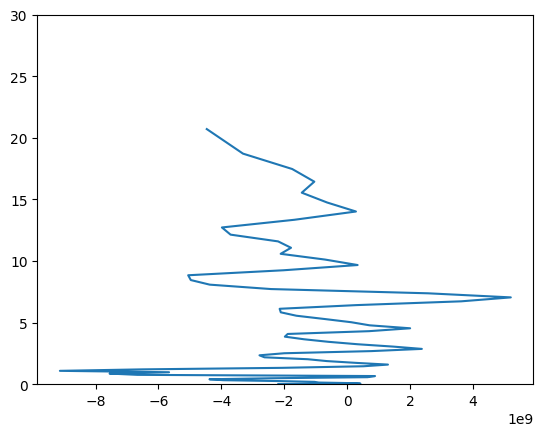

In [31]:
tot_lhr = np.gradient(ds_nosip.d_lhr, axis=0)

mean_dlhr = ds_nosip.d_lhr.mean(dim=('time','ncells'))

plt.plot(mean_dlhr,1.e-3*ds_nosip.z_mc.mean(dim=('time','ncells')))
plt.ylim(0,30)

In [17]:
tot_lhr_kpers = tot_lhr/(30.*60.)
tot_lhr_kperd = tot_lhr_kpers*86400.

print(np.min(tot_lhr))
print(np.max(tot_lhr))
print(np.min(tot_lhr_kpers))
print(np.max(tot_lhr_kpers))
print(np.min(tot_lhr_kperd))
print(np.max(tot_lhr_kperd))

-1161915100000.0
1562873700000.0
-645508400.0
868263200.0
-55771930000000.0
75017940000000.0


In [ ]:
tot_lhr_kperd = xr.DataArray(tot_lhr_kperd)
tot_lhr_kperd

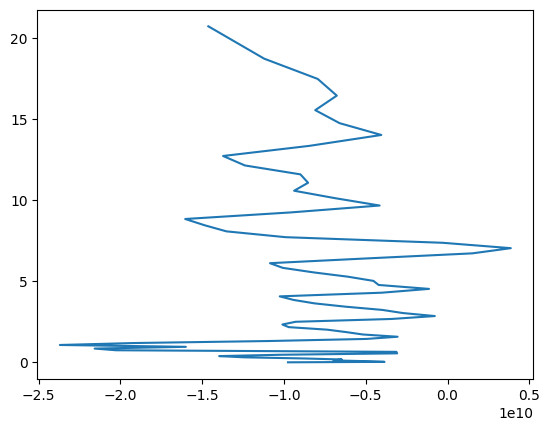

In [32]:
plt.plot(tot_lhr_kperd.mean(dim=('dim_0','dim_2')), 1.e-3*ds_nosip.z_mc.mean(dim=('time','ncells')))

In [47]:
ddt_temp_gscp_mean = 86400*ds_nosip.ddt_temp_gscp.mean(dim=('time','ncells'))


In [41]:

d_lhr_kpers = (1/1800.)*np.gradient(ds_nosip.d_lhr, axis=0)
d_lhr_kperday = d_lhr_kpers*86400.

mean_lhr_kperday = np.mean(d_lhr_kperday, axis=(0,2))

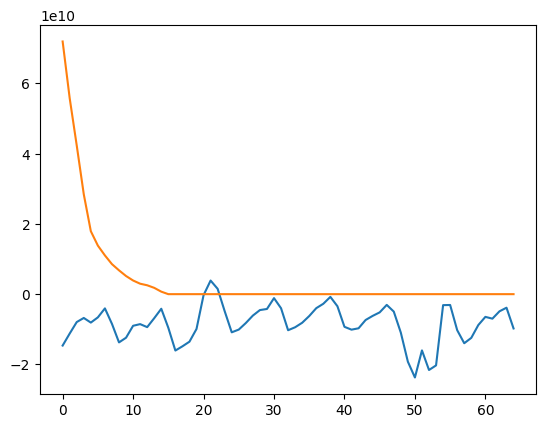

In [48]:
plt.plot(mean_lhr_kperday)
plt.plot(ddt_temp_gscp_mean)

In [35]:

print(d_lhr_perday.shape)

(41, 65, 73960)


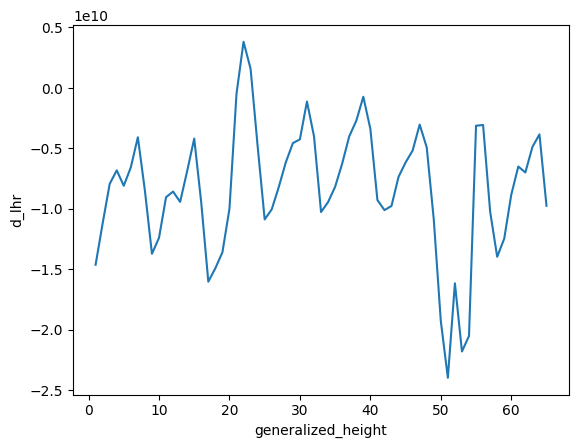

In [27]:

mean_lhr_kperday = ddt_lhr_kperday.mean(dim=('time','ncells'))

mean_lhr_kperday.plot()

In [22]:

x_sec = 1.e11
x_day = 86400.*x_sec

x_sec = x_day/86400.
x_persec = 1./x_sec
x_perday = x_persec*86400.

print(x_persec, x_perday)


1e-11 8.639999999999999e-07


In [19]:
ddt_lhr_kpers

<xarray.DataArray 'd_lhr' (time: 40, height: 65, ncells: 73960)>
dask.array<truediv, shape=(40, 65, 73960), dtype=float32, chunksize=(1, 65, 73960), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2024-09-03T00:30:00 ... 2024-09-03T20:00:00
    clon     (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
    clat     (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 61.0 62.0 63.0 64.0 65.0
Dimensions without coordinates: ncells

In [5]:


#### 1-moment
toa_sw_up_1mom = ds_1mom.swflx_up[:,0,:]
toa_sw_up_clr_1mom = ds_1mom.swflx_up_clr[:,0,:]
toa_lw_up_1mom = ds_1mom.lwflx_up[:,0,:]
toa_lw_up_clr_1mom = ds_1mom.lwflx_up_clr[:,0,:]

toa_sw_dn_1mom = ds_1mom.swflx_dn[:,0,:]
toa_sw_dn_clr_1mom = ds_1mom.swflx_dn_clr[:,0,:]
toa_lw_dn_1mom = ds_1mom.lwflx_dn[:,0,:]
toa_lw_dn_clr_1mom = ds_1mom.lwflx_dn_clr[:,0,:]

#### No SIP (Generalized estimation for effective particle size, not dependent on number conc.)
toa_sw_up_nosip = ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_nosip = ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_nosip = ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_nosip = ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip = ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip = ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip = ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr[:,0,:]

#### No SIP (Effective particle size is being estimated from number conc.)
toa_sw_up_nosip_efrad = ds_nosip_effrad.swflx_up[:,0,:]
toa_sw_up_clr_nosip_efrad = ds_nosip_effrad.swflx_up_clr[:,0,:]
toa_lw_up_nosip_efrad = ds_nosip_effrad.lwflx_up[:,0,:]
toa_lw_up_clr_nosip_efrad = ds_nosip_effrad.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip_efrad = ds_nosip_effrad.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip_efrad = ds_nosip_effrad.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip_efrad = ds_nosip_effrad.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip_efrad = ds_nosip_effrad.lwflx_dn_clr[:,0,:]

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

toa_cre_sw_1mom = (toa_sw_dn_1mom-toa_sw_up_1mom) - (toa_sw_dn_clr_1mom-toa_sw_up_clr_1mom)
toa_cre_sw_nosip = (toa_sw_dn_nosip-toa_sw_up_nosip) - (toa_sw_dn_clr_nosip-toa_sw_up_clr_nosip)
toa_cre_sw_nosip_efrad = (toa_sw_dn_nosip_efrad-toa_sw_up_nosip_efrad) - (toa_sw_dn_clr_nosip_efrad-toa_sw_up_clr_nosip_efrad)

toa_cre_lw_1mom = (toa_lw_dn_1mom-toa_lw_up_1mom) - (toa_lw_dn_clr_1mom-toa_lw_up_clr_1mom)
toa_cre_lw_nosip = (toa_sw_dn_nosip-toa_lw_up_nosip) - (toa_sw_dn_clr_nosip-toa_lw_up_clr_nosip)
toa_cre_lw_nosip_efrad = (toa_lw_dn_nosip_efrad-toa_lw_up_nosip_efrad) - (toa_lw_dn_clr_nosip_efrad-toa_lw_up_clr_nosip_efrad)

toa_net_cre_1mom = toa_cre_sw_1mom+toa_cre_lw_1mom
toa_net_cre_nosip = toa_cre_sw_nosip+toa_cre_lw_nosip
toa_net_cre_nosip_efrad = toa_cre_sw_nosip_efrad+toa_cre_lw_nosip_efrad

del_toa_sw_cre_efrad = toa_cre_sw_nosip_efrad-toa_cre_sw_nosip
del_toa_lw_cre_efrad = toa_cre_lw_nosip_efrad-toa_cre_lw_nosip
del_toa_net_cre_efrad = toa_net_cre_nosip_efrad-toa_net_cre_nosip



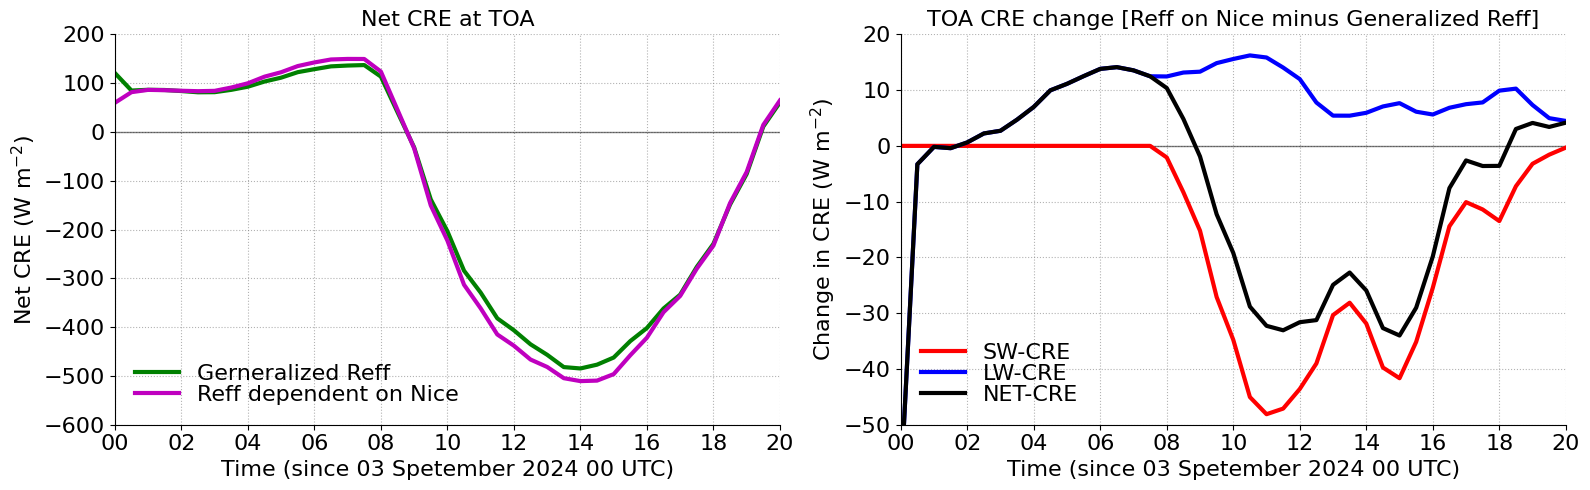

In [6]:

plt.figure(figsize=(16, 5))
linewidth=3
fontsize=16
plt.subplot(1,2,1)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

#plt.plot(ds_1mom.time, toa_net_cre_1mom.mean('ncells'), 'r-', linewidth=linewidth, label='1-moment')
plt.plot(ds_nosip.time, toa_net_cre_nosip.mean('ncells'), 'g-', linewidth=linewidth, label='Gerneralized Reff')
plt.plot(ds_nosip_effrad.time, toa_net_cre_nosip_efrad.mean('ncells'), 'm-', linewidth=linewidth, label='Reff dependent on Nice')
plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-600,200)
plt.yticks(fontsize=fontsize)
plt.ylabel('Net CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('Net CRE at TOA', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle=':', color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_nosip_effrad.time, del_toa_sw_cre_efrad.mean('ncells'), 'r-', linewidth=linewidth, label='SW-CRE')
plt.plot(ds_nosip_effrad.time, del_toa_lw_cre_efrad.mean('ncells'), 'b-', linewidth=linewidth, label='LW-CRE')
plt.plot(ds_nosip_effrad.time, del_toa_net_cre_efrad.mean('ncells'), 'k-', linewidth=linewidth, label='NET-CRE')

plt.xlabel('Time (since 03 Spetember 2024 00 UTC)', fontsize=fontsize)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)  
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-50,20)
plt.yticks(fontsize=fontsize)
plt.ylabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('TOA CRE change [Reff on Nice minus Generalized Reff]', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, ncols=1, loc='lower left')
plt.grid(True, linestyle=':', color='grey',alpha=0.6)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [45]:
print(ds_sip.ddt_temp_radsw.min().values)
print(ds_sip.ddt_temp_radsw.max().values)

0.0
0.0012396787


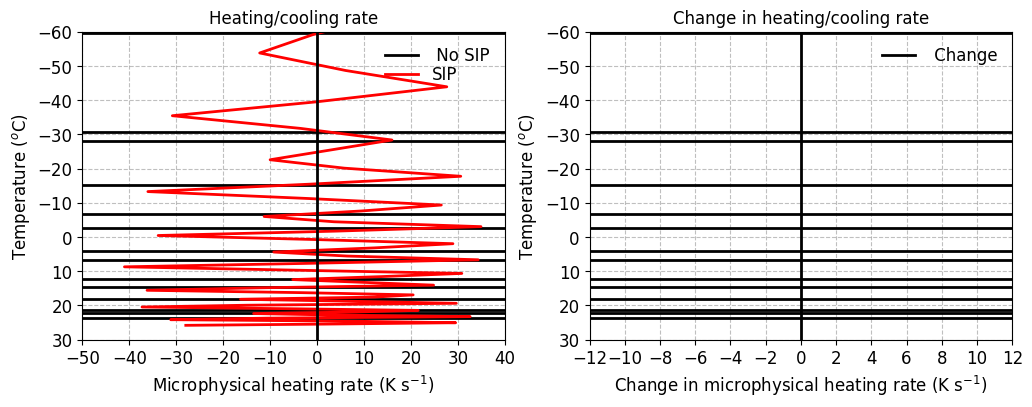

In [6]:


filt_ddt_gscp = xr.where(ds_nosip.tot_qcld > 1.e-5, ds_nosip.d_lhr, np.nan)
mean_microph_ddt_nosip = filt_ddt_gscp.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))

filt_ddt_gscp = xr.where(ds_sip.tot_qcld > 1.e-5, ds_sip.ddt_temp_gscp, np.nan)
mean_microph_ddt_sip = filt_ddt_gscp.mean(dim=('time','ncells'))
mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))

del_microph_ddt = mean_microph_ddt_sip-mean_microph_ddt_nosip

# Plotting
plt.figure(figsize=(12, 4))
deg_faint_errbar = 0.6
lnwdth=2
fontsize=12
plt.subplot(1,2,1)
plt.plot(mean_microph_ddt_nosip,mean_tempc_nosip, 'k-', label=' No SIP', linewidth = lnwdth)
plt.plot(mean_microph_ddt_sip,mean_tempc_sip, 'r-', label='SIP', linewidth = lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2)

plt.xlim(-50, 40)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40], fontsize=fontsize)
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Heating/cooling rate', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', alpha=0.5, color='grey')

plt.subplot(1,2,2)

plt.plot(del_microph_ddt,mean_tempc_nosip, 'k-', label=' Change', linewidth = lnwdth)
plt.axvline(x=0, color='k', linestyle='-', linewidth=2)

plt.xlim(-12, 12)
plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12], fontsize=fontsize)
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60], fontsize=fontsize)
plt.xlabel('Change in microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Change in heating/cooling rate', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')#, ncol = 1, fontsize='16', bbox_to_anchor=(1.02, 1.02))
plt.grid(True, linestyle='--', alpha=0.5, color='grey')

plt.show()


In [48]:
ds_sip

<xarray.Dataset>
Dimensions:         (time: 41, ncells: 73960, vertices: 3, height: 65, bnds: 2,
                     height_2: 66, plev: 1, plev_2: 1, plev_3: 1)
Coordinates:
  * time            (time) datetime64[ns] 2024-09-03 ... 2024-09-03T20:00:00
    clon            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
    clat            (ncells) float64 dask.array<chunksize=(73960,), meta=np.ndarray>
  * height          (height) float64 1.0 2.0 3.0 4.0 5.0 ... 62.0 63.0 64.0 65.0
  * height_2        (height_2) float64 1.0 2.0 3.0 4.0 ... 63.0 64.0 65.0 66.0
  * plev            (plev) float64 800.0
  * plev_2          (plev_2) float64 400.0
  * plev_3          (plev_3) float64 0.0
Dimensions without coordinates: ncells, vertices, bnds
Data variables: (12/85)
    clon_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    clat_bnds       (time, ncells, vertices) float64 dask.array<chunksize=(1, 73960, 3), meta=np.ndarray>
    height_bnds     (time, height, bnds) float64 dask.array<chunksize=(1, 65, 2), meta=np.ndarray>
    plev_bnds       (time, plev, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_2_bnds     (time, plev_2, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    plev_3_bnds     (time, plev_3, bnds) float64 dask.array<chunksize=(1, 1, 2), meta=np.ndarray>
    ...              ...
    tot_qcld        (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    lwc_gperm3      (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    ciwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    tiwc_gperm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    cdnc_percm3     (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
    inc_perl        (time, height, ncells) float32 dask.array<chunksize=(1, 65, 73960), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 2.4.0 (https://mpime...
    Conventions:          CF-1.6
    number_of_grid_used:  99
    uuidOfHGrid:          572c63b4-5951-d138-93bd-61b05c102860
    uuidOfVGrid:          567425a0-32bf-151c-3811-4389b7cd21e0
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    title:                ICON simulation
    source:               version: 2024.10; revision: 885c4646a69d44aa9e9fdf4...
    history:              /home/b/b382718/tdf_sip_lfr/icon-oct2024/bin/icon a...
    references:           see MPIM/DWD publications
    comment:              Deepak Waman (b382718) on l40493 (Linux 4.18.0-513....

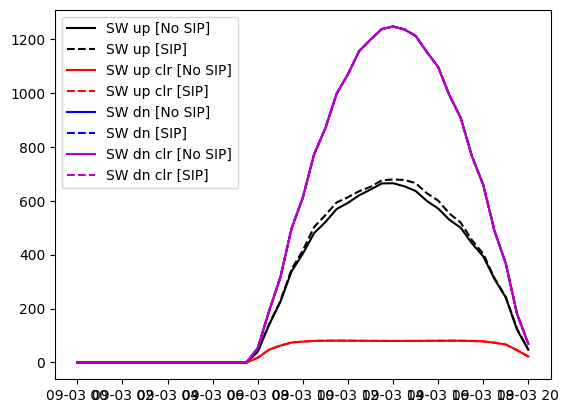

In [7]:

#### 1-moment
toa_sw_up_1mom = ds_1mom.swflx_up[:,0,:]
toa_sw_up_clr_1mom = ds_1mom.swflx_up_clr[:,0,:]
toa_lw_up_1mom = ds_1mom.lwflx_up[:,0,:]
toa_lw_up_clr_1mom = ds_1mom.lwflx_up_clr[:,0,:]

toa_sw_dn_1mom = ds_1mom.swflx_dn[:,0,:]
toa_sw_dn_clr_1mom = ds_1mom.swflx_dn_clr[:,0,:]
toa_lw_dn_1mom = ds_1mom.lwflx_dn[:,0,:]
toa_lw_dn_clr_1mom = ds_1mom.lwflx_dn_clr[:,0,:]

#### SIP
toa_sw_up_sip = ds_sip.swflx_up[:,0,:]
toa_sw_up_clr_sip = ds_sip.swflx_up_clr[:,0,:]
toa_lw_up_sip = ds_sip.lwflx_up[:,0,:]
toa_lw_up_clr_sip = ds_sip.lwflx_up_clr[:,0,:]

toa_sw_dn_sip = ds_sip.swflx_dn[:,0,:]
toa_sw_dn_clr_sip = ds_sip.swflx_dn_clr[:,0,:]
toa_lw_dn_sip = ds_sip.lwflx_dn[:,0,:]
toa_lw_dn_clr_sip = ds_sip.lwflx_dn_clr[:,0,:]

#### No SIP
toa_sw_up_nosip = ds_nosip.swflx_up[:,0,:]
toa_sw_up_clr_nosip = ds_nosip.swflx_up_clr[:,0,:]
toa_lw_up_nosip = ds_nosip.lwflx_up[:,0,:]
toa_lw_up_clr_nosip = ds_nosip.lwflx_up_clr[:,0,:]

toa_sw_dn_nosip = ds_nosip.swflx_dn[:,0,:]
toa_sw_dn_clr_nosip = ds_nosip.swflx_dn_clr[:,0,:]
toa_lw_dn_nosip = ds_nosip.lwflx_dn[:,0,:]
toa_lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr[:,0,:]

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

toa_cre_sw_1mom = (toa_sw_dn_1mom-toa_sw_up_1mom) - (toa_sw_dn_clr_1mom-toa_sw_up_clr_1mom)
toa_cre_sw_nosip = (toa_sw_dn_nosip-toa_sw_up_nosip) - (toa_sw_dn_clr_nosip-toa_sw_up_clr_nosip)
toa_cre_sw_sip = (toa_sw_dn_sip-toa_sw_up_sip) - (toa_sw_dn_clr_sip-toa_sw_up_clr_sip)

toa_cre_lw_1mom = (toa_lw_dn_1mom-toa_lw_up_1mom) - (toa_lw_dn_clr_1mom-toa_lw_up_clr_1mom)
toa_cre_lw_nosip = (toa_sw_dn_nosip-toa_lw_up_nosip) - (toa_sw_dn_clr_nosip-toa_lw_up_clr_nosip)
toa_cre_lw_sip = (toa_lw_dn_sip-toa_lw_up_sip) - (toa_lw_dn_clr_sip-toa_lw_up_clr_sip)

toa_net_cre_1mom = toa_cre_sw_1mom+toa_cre_lw_1mom
toa_net_cre_nosip = toa_cre_sw_nosip+toa_cre_lw_nosip
toa_net_cre_sip = toa_cre_sw_sip+toa_cre_lw_sip

del_toa_sw_cre = toa_cre_sw_sip-toa_cre_sw_nosip
del_toa_lw_cre = toa_cre_lw_sip-toa_cre_lw_nosip
del_toa_net_cre = toa_net_cre_sip-toa_net_cre_nosip

plt.plot(ds_nosip.time,toa_sw_up_nosip.mean('ncells'), 'k-', label='SW up [No SIP]')
plt.plot(ds_sip.time,toa_sw_up_sip.mean('ncells'), 'k--', label='SW up [SIP]')
plt.plot(ds_nosip.time,toa_sw_up_clr_nosip.mean('ncells'), 'r-', label='SW up clr [No SIP]')
plt.plot(ds_sip.time,toa_sw_up_clr_sip.mean('ncells'), 'r--', label='SW up clr [SIP]')
plt.plot(ds_nosip.time,toa_sw_dn_nosip.mean('ncells'), 'b-', label='SW dn [No SIP]')
plt.plot(ds_sip.time,toa_sw_dn_sip.mean('ncells'), 'b--', label='SW dn [SIP]')
plt.plot(ds_nosip.time,toa_sw_dn_clr_nosip.mean('ncells'), 'm-', label='SW dn clr [No SIP]')
plt.plot(ds_sip.time,toa_sw_dn_clr_sip.mean('ncells'), 'm--', label='SW dn clr [SIP]')
plt.legend()
#plt.plot(ds_sip.time,toa_cre_sw_sip.mean('ncells')-toa_cre_sw_nosip.mean('ncells'), 'k-', label='SW-CRE @ TOA')
#plt.plot(ds_sip.time,toa_cre_lw_sip.mean('ncells')-toa_cre_lw_nosip.mean('ncells'), 'r-', label='LW-CRE @ TOA')

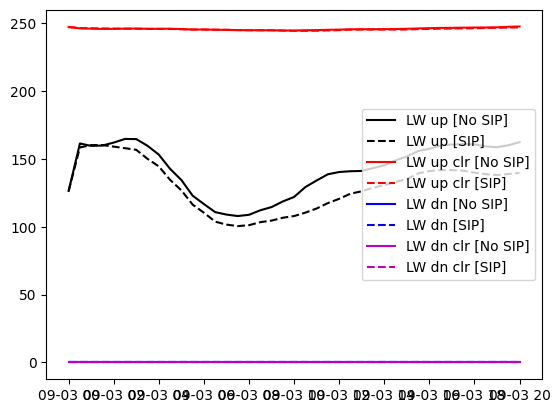

In [69]:
plt.plot(ds_nosip.time,toa_lw_up_nosip.mean('ncells'), 'k-', label='LW up [No SIP]')
plt.plot(ds_sip.time,toa_lw_up_sip.mean('ncells'), 'k--', label='LW up [SIP]')
plt.plot(ds_nosip.time,toa_lw_up_clr_nosip.mean('ncells'), 'r-', label='LW up clr [No SIP]')
plt.plot(ds_sip.time,toa_lw_up_clr_sip.mean('ncells'), 'r--', label='LW up clr [SIP]')
plt.plot(ds_nosip.time,toa_lw_dn_nosip.mean('ncells'), 'b-', label='LW dn [No SIP]')
plt.plot(ds_sip.time,toa_lw_dn_sip.mean('ncells'), 'b--', label='LW dn [SIP]')
plt.plot(ds_nosip.time,toa_lw_dn_clr_nosip.mean('ncells'), 'm-', label='LW dn clr [No SIP]')
plt.plot(ds_sip.time,toa_lw_dn_clr_sip.mean('ncells'), 'm--', label='LW dn clr [SIP]')
plt.legend()

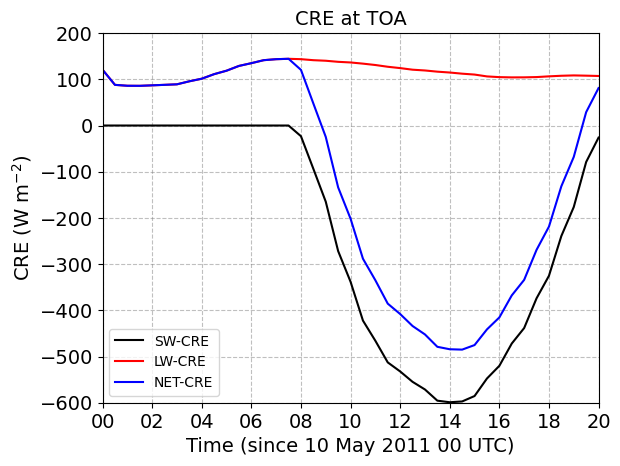

In [82]:
plt.plot(ds_sip.time, toa_cre_sw_sip.mean('ncells'), 'k-', label='SW-CRE')
plt.plot(ds_sip.time, toa_cre_lw_sip.mean('ncells'), 'r-', label='LW-CRE')
plt.plot(ds_sip.time, toa_net_cre_sip.mean('ncells'), 'b-', label='NET-CRE')
plt.xlabel('Time (since 10 May 2011 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0)  # Start at 00 UTC on 10 May 2011
end_date = datetime(2024, 9, 3, 20, 0)   # End at 12 UTC on 12 May 2011
plt.xlim(start_date, end_date)
plt.xticks(fontsize=14)
plt.ylim(-600,200)
plt.yticks(fontsize=14)
plt.ylabel('CRE (W m$^{-2}$)', fontsize=14)
plt.title('CRE at TOA', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', color='grey',alpha=0.5)

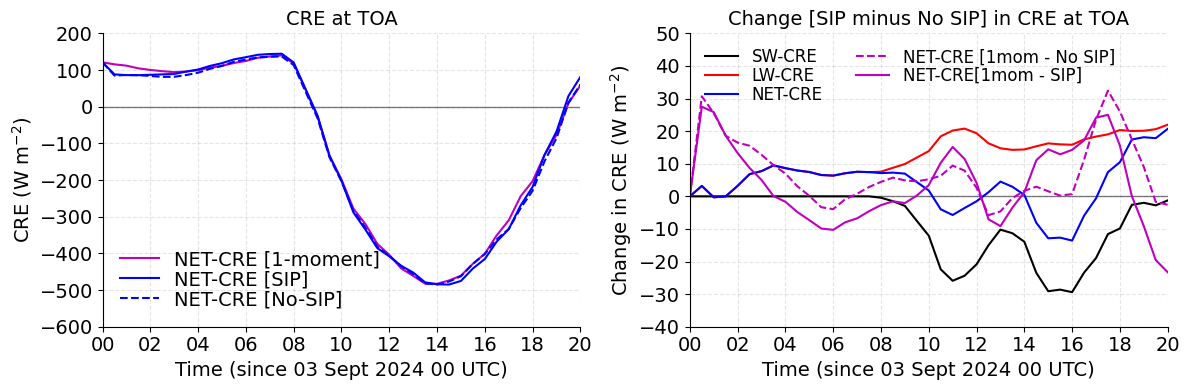

In [9]:

plt.figure(figsize=(12, 4))
linewidth=2
fontsize=14
plt.subplot(1,2,1)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_1mom.time, toa_net_cre_1mom.mean('ncells'), 'm-', label='NET-CRE [1-moment]')
#plt.plot(ds_sip.time, toa_cre_sw_sip.mean('ncells'), 'k-', label='SW-CRE [SIP]')
#plt.plot(ds_sip.time, toa_cre_lw_sip.mean('ncells'), 'r-', label='LW-CRE [SIP]')
plt.plot(ds_sip.time, toa_net_cre_sip.mean('ncells'), 'b-', label='NET-CRE [SIP]')
#plt.plot(ds_sip.time, toa_cre_sw_nosip.mean('ncells'), 'k--', label='SW-CRE [No-SIP]')
#plt.plot(ds_sip.time, toa_cre_lw_nosip.mean('ncells'), 'r--', label='LW-CRE [No-SIP]')
plt.plot(ds_sip.time, toa_net_cre_nosip.mean('ncells'), 'b--', label='NET-CRE [No-SIP]')
plt.xlabel('Time (since 03 Sept 2024 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)   
plt.xlim(start_date, end_date)
plt.xticks(fontsize=14)
plt.ylim(-600,200)
plt.yticks(fontsize=14)
plt.ylabel('CRE (W m$^{-2}$)', fontsize=14)
plt.title('CRE at TOA', fontsize=14)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle='--', color='grey',alpha=0.2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)

plt.axhline(y=0, color='k', linestyle='-', linewidth=1, alpha=0.5)

plt.plot(ds_sip.time, del_toa_sw_cre.mean('ncells'), 'k-', label='SW-CRE')
plt.plot(ds_sip.time, del_toa_lw_cre.mean('ncells'), 'r-', label='LW-CRE')
plt.plot(ds_sip.time, del_toa_net_cre.mean('ncells'), 'b-', label='NET-CRE')
plt.plot(ds_sip.time, toa_net_cre_1mom.mean('ncells')-toa_net_cre_nosip.mean('ncells'), 'm--', label='NET-CRE [1mom - No SIP]')
plt.plot(ds_sip.time, toa_net_cre_1mom.mean('ncells')-toa_net_cre_sip.mean('ncells'), 'm-', label='NET-CRE[1mom - SIP]')



plt.xlabel('Time (since 03 Sept 2024 00 UTC)', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
start_date = datetime(2024, 9, 3, 0, 0) 
end_date = datetime(2024, 9, 3, 20, 0)  
plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.ylim(-40,50)
plt.yticks(fontsize=fontsize)
plt.ylabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.title('Change [SIP minus No SIP] in CRE at TOA', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize-2, ncols=2, loc='upper left')
plt.grid(True, linestyle='--', color='grey',alpha=0.2)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [88]:

sw_up_sip = ds_sip.swflx_up
sw_up_clr_sip = ds_sip.swflx_up_clr
lw_up_sip = ds_sip.lwflx_up
lw_up_clr_sip = ds_sip.lwflx_up_clr

sw_dn_sip = ds_sip.swflx_dn
sw_dn_clr_sip = ds_sip.swflx_dn_clr
lw_dn_sip = ds_sip.lwflx_dn
lw_dn_clr_sip = ds_sip.lwflx_dn_clr

sw_up_nosip = ds_nosip.swflx_up
sw_up_clr_nosip = ds_nosip.swflx_up_clr
lw_up_nosip = ds_nosip.lwflx_up
lw_up_clr_nosip = ds_nosip.lwflx_up_clr

sw_dn_nosip = ds_nosip.swflx_dn
sw_dn_clr_nosip = ds_nosip.swflx_dn_clr
lw_dn_nosip = ds_nosip.lwflx_dn
lw_dn_clr_nosip = ds_nosip.lwflx_dn_clr

#CRE_sw = (Qcld_sw_dn - Qcld_sw_up) - (Qclear_sw_dn - Qclear_sw_up)

cre_sw_nosip = (sw_dn_nosip-sw_up_nosip) - (sw_dn_clr_nosip-sw_up_clr_nosip)
cre_sw_sip = (sw_dn_sip-sw_up_sip) - (sw_dn_clr_sip-sw_up_clr_sip)

cre_lw_nosip = (sw_dn_nosip-lw_up_nosip) - (sw_dn_clr_nosip-lw_up_clr_nosip)
cre_lw_sip = (lw_dn_sip-lw_up_sip) - (lw_dn_clr_sip-lw_up_clr_sip)

net_cre_nosip = cre_sw_nosip+cre_lw_nosip
net_cre_sip = cre_sw_sip+cre_lw_sip

del_sw_cre = cre_sw_sip-cre_sw_nosip
del_lw_cre = cre_lw_sip-cre_lw_nosip
del_net_cre = net_cre_sip-net_cre_nosip


In [ ]:

mean_cre_sw_sip = cre_sw_sip.mean(dim=('time','ncells'))
mean_cre_lw_sip = cre_lw_sip.mean(dim=('time','ncells'))
mean_cre_net_sip = net_cre_sip.mean(dim=('time','ncells'))

mean_cre_sw_nosip = cre_sw_nosip.mean(dim=('time','ncells'))
mean_cre_lw_nosip = cre_lw_nosip.mean(dim=('time','ncells'))
mean_cre_net_nosip = net_cre_nosip.mean(dim=('time','ncells'))

mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))


mean_del_sw_cre = mean_cre_sw_sip-mean_cre_sw_nosip
mean_del_lw_cre = mean_cre_lw_sip-mean_cre_lw_nosip
mean_del_net_cre = mean_cre_net_sip-mean_cre_net_nosip

plt.figure(figsize=(12, 4))
linewidth=2
fontsize=14
plt.subplot(1,2,1)
plt.plot(mean_cre_sw_sip[:-1], mean_tempc_sip, 'k-', label='SW-CRE  [SIP]')
plt.plot(mean_cre_lw_sip[:-1], mean_tempc_sip, 'r-', label='LW-CRE [SIP]')
plt.plot(mean_cre_net_sip[:-1], mean_tempc_sip, 'b-', label='NET-CRE [SIP]')
plt.plot(mean_cre_sw_nosip[:-1], mean_tempc_sip, 'k--', label='SW-CRE  [No-SIP]')
plt.plot(mean_cre_lw_nosip[:-1], mean_tempc_sip, 'r--', label='LW-CRE [No-SIP]')
plt.plot(mean_cre_net_nosip[:-1],mean_tempc_sip, 'b--', label='NET-CRE [No-SIP]')

plt.xticks(fontsize=fontsize)
plt.xlim(-500,200)
plt.ylim(30,-60)
plt.yticks(fontsize=14)
plt.xlabel('CRE (W m$^{-2}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
plt.grid(True, linestyle='--', color='grey',alpha=0.5)

plt.subplot(1,2,2)
plt.plot(mean_del_sw_cre[:-1], mean_tempc_sip, 'k-', label='SW-CRE')
plt.plot(mean_del_lw_cre[:-1], mean_tempc_sip, 'r-', label='LW-CRE')
plt.plot(mean_del_net_cre[:-1], mean_tempc_sip, 'b-', label='NET-CRE')

#plt.xlim(start_date, end_date)
plt.xticks(fontsize=fontsize)
plt.xlim(-50,300)
plt.ylim(30,-60)
plt.yticks(fontsize=fontsize)
plt.xlabel('Change in CRE (W m$^{-2}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Change [SIP minus No SIP] in CRE', fontsize=fontsize)
plt.legend()
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper left')
plt.grid(True, linestyle='--', color='grey',alpha=0.5)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3863367/1962754006.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')


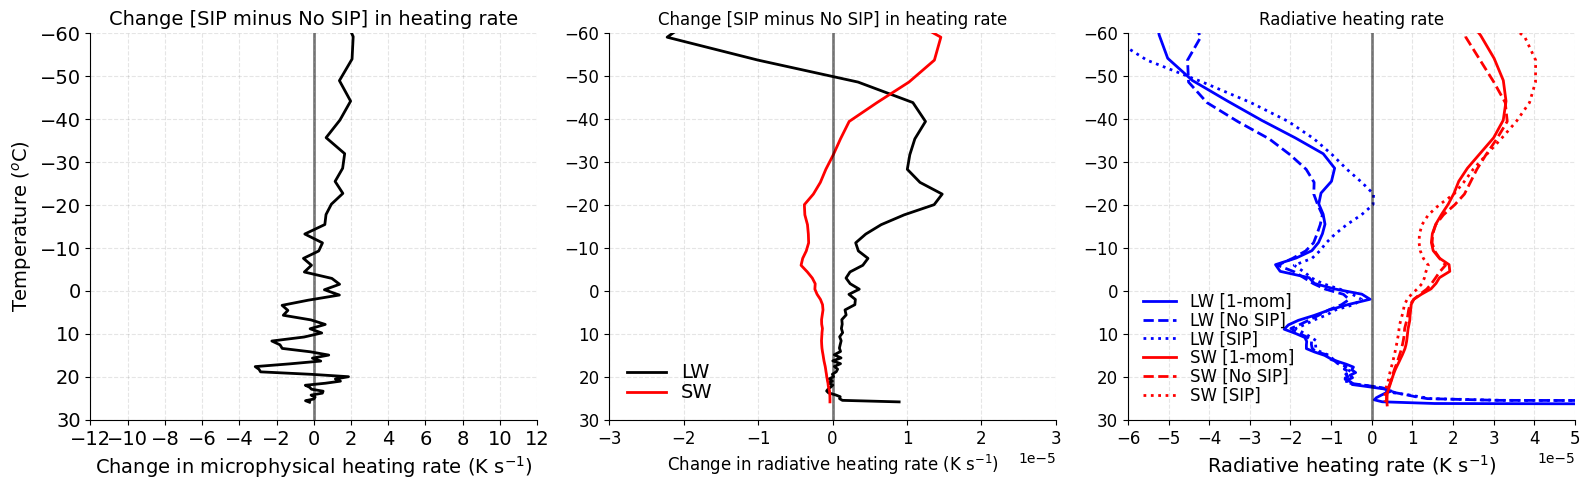

In [143]:
### Microphysical temperature tendency
mean_microph_ddt_1mom = ds_1mom.ddt_temp_gscp.mean(dim=('time','ncells'))
mean_microph_ddt_nosip = ds_nosip.ddt_temp_gscp.mean(dim=('time','ncells'))
mean_microph_ddt_sip = ds_sip.ddt_temp_gscp.mean(dim=('time','ncells'))

del_microph_ddt = mean_microph_ddt_sip-mean_microph_ddt_nosip

mean_tempc_1mom = ds_1mom.tempc.mean(dim=('time','ncells'))
mean_tempc_nosip = ds_nosip.tempc.mean(dim=('time','ncells'))
mean_tempc_sip = ds_sip.tempc.mean(dim=('time','ncells'))

### LW temperature tendency
mean_lw_ddt_1mom = ds_1mom.ddt_temp_radlw.mean(dim=('time','ncells'))
mean_lw_ddt_nosip = ds_nosip.ddt_temp_radlw.mean(dim=('time','ncells'))
mean_lw_ddt_sip = ds_sip.ddt_temp_radlw.mean(dim=('time','ncells'))

del_lw_ddt = mean_lw_ddt_sip-mean_lw_ddt_nosip

### SW temperature tendency
mean_sw_ddt_1mom = ds_1mom.ddt_temp_radsw.mean(dim=('time','ncells'))
mean_sw_ddt_nosip = ds_nosip.ddt_temp_radsw.mean(dim=('time','ncells'))
mean_sw_ddt_sip = ds_sip.ddt_temp_radsw.mean(dim=('time','ncells'))

del_sw_ddt = mean_sw_ddt_sip-mean_sw_ddt_nosip


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

deg_faint_errbar = 0.6
lnwdth = 2
fontsize = 14

# Subplot 1: Change in microphysical heating/cooling rate
axes[0].plot(del_microph_ddt, mean_tempc_nosip, 'k-', label='', linewidth=lnwdth)

axes[0].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[0].set_xlim(-12, 12)
axes[0].set_xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
axes[0].tick_params(axis='both', labelsize=fontsize)
axes[0].set_ylim(30, -60)
axes[0].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[0].set_xlabel('Change in microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
axes[0].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[0].set_title('Change [SIP minus No SIP] in heating rate', fontsize=fontsize)
axes[0].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
axes[0].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

# Subplot 2: Change in radiative heating/cooling rate
axes[1].plot(del_lw_ddt, mean_tempc_sip, 'k-', label='LW', linewidth=lnwdth)
axes[1].plot(del_sw_ddt, mean_tempc_sip, 'r-', label='SW', linewidth=lnwdth)
axes[1].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[1].set_xlim(-3.e-5, 3.e-5)
axes[1].set_xticks([-3.e-5, -2.e-5, -1.e-5, 0, 1.e-5, 2.e-5, 3.e-5])
axes[1].set_ylim(30, -60)
#axes[1].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[1].tick_params(axis='both', labelsize=fontsize-2)
axes[1].set_xlabel('Change in radiative heating rate (K s$^{-1}$)', fontsize=fontsize-2)
#axes[1].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[1].set_title('Change [SIP minus No SIP] in heating rate', fontsize=fontsize-2)
axes[1].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='lower left')
axes[1].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Subplot 3: Change in radiative heating/cooling rate
axes[2].plot(mean_lw_ddt_1mom, mean_tempc_1mom, 'b-', label='LW [1-mom]', linewidth=lnwdth)
axes[2].plot(mean_lw_ddt_nosip, mean_tempc_sip, 'b--', label='LW [No SIP]', linewidth=lnwdth)
axes[2].plot(mean_lw_ddt_sip, mean_tempc_sip, 'b:', label='LW [SIP]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_1mom, mean_tempc_1mom, 'r-', label='SW [1-mom]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_nosip, mean_tempc_sip, 'r--', label='SW [No SIP]', linewidth=lnwdth)
axes[2].plot(mean_sw_ddt_sip, mean_tempc_sip, 'r:', label='SW [SIP]', linewidth=lnwdth)
axes[2].axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

axes[2].set_xlim(-6.e-5, 5.e-5)
axes[2].set_xticks([-6.e-5, -5.e-5, -4.e-5, -3.e-5, -2.e-5, -1.e-5, 0, 1.e-5, 2.e-5, 3.e-5, 4.e-5, 5.e-5])
axes[2].set_ylim(30, -60)
#axes[2].set_yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
axes[2].tick_params(axis='both', labelsize=fontsize-2)
axes[2].set_xlabel('Radiative heating rate (K s$^{-1}$)', fontsize=fontsize)
#axes[2].set_ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
axes[2].set_title('Radiative heating rate', fontsize=fontsize-2)
axes[2].legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize-2, loc='lower left')
axes[2].grid(True, linestyle='--', alpha=0.2, color='grey')

axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)

plt.tight_layout()

plt.show()


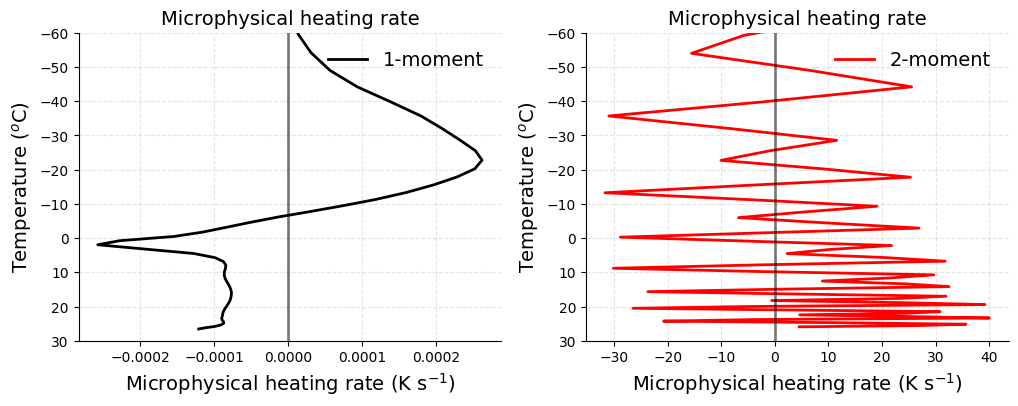

In [149]:

deg_faint_errbar = 0.6
lnwdth = 2
fontsize = 14


plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(ds_1mom.ddt_temp_gscp.mean(dim=('time','ncells')), ds_1mom.tempc.mean(dim=('time','ncells')), 'k-', label='1-moment', linewidth=lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

#plt.xlim(-12, 12)
#plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Microphysical heating rate', fontsize=fontsize)
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.2, color='grey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.subplot(1,2,2)
plt.plot(ds_nosip.ddt_temp_gscp.mean(dim=('time','ncells')), ds_nosip.tempc.mean(dim=('time','ncells')), 'r-', label='2-moment', linewidth=lnwdth)

plt.axvline(x=0, color='k', linestyle='-', linewidth=2, alpha=0.5)

#plt.xlim(-12, 12)
#plt.xticks([-12, -10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12])
plt.ylim(30, -60)
plt.yticks([30, 20, 10, 0, -10, -20, -30, -40, -50, -60])
plt.xlabel('Microphysical heating rate (K s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature ($^{o}$C)', fontsize=fontsize)
plt.title('Microphysical heating rate', fontsize=fontsize)
plt.legend(frameon=False, handlelength=2, labelspacing=0.05, fontsize=fontsize, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.2, color='grey')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


In [14]:

#######
min_tempc_sip = ds_sip.tempc.min().values
max_tempc_sip = ds_sip.tempc.max().values

min_wvel_sip = ds_sip.w_vel.min().values
max_wvel_sip = ds_sip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_bin = np.linspace(min_tempc_sip, max_tempc_sip, num_temp_bin+1)
wvel_bin = np.linspace(min_wvel_sip, max_wvel_sip, num_w_bin+1)
#######

#######
tempc_sip_flat = ds_sip.tempc.values.flatten()
wvel_sip_flat = ds_sip.w_vel.values.flatten()

qc_sip_flat = ds_sip.qc.values.flatten()
qi_sip_flat = ds_sip.qi.values.flatten()
qs_sip_flat = ds_sip.qs.values.flatten()
qg_sip_flat = ds_sip.qg.values.flatten()
qh_sip_flat = ds_sip.qh.values.flatten()
qr_sip_flat = ds_sip.qr.values.flatten()
tqi_sip_flat = ds_sip.tqi.values.flatten()
#######

hist_sip, temp_edges_sip, wvel_edges_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin))

#######
qc_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qc_sip_flat)[0]
qi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qi_sip_flat)[0]
qs_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qs_sip_flat)[0]
qg_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qg_sip_flat)[0]
qh_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qh_sip_flat)[0]
qr_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = qr_sip_flat)[0]
tqi_sum_sip = np.histogram2d(tempc_sip_flat, wvel_sip_flat, bins=(temp_bin, wvel_bin), weights = tqi_sip_flat)[0]
#######

#######
avg_qc_temp_w_sip = qc_sum_sip/hist_sip
avg_qc_temp_w_sip[avg_qc_temp_w_sip < 1.e-9] = np.nan

avg_qi_temp_w_sip = qi_sum_sip/hist_sip
avg_qi_temp_w_sip[avg_qi_temp_w_sip < 1.e-9] = np.nan

avg_qs_temp_w_sip = qs_sum_sip/hist_sip
avg_qs_temp_w_sip[avg_qs_temp_w_sip < 1.e-9] = np.nan

avg_qg_temp_w_sip = qg_sum_sip/hist_sip
avg_qg_temp_w_sip[avg_qg_temp_w_sip < 1.e-9] = np.nan

avg_qh_temp_w_sip = qh_sum_sip/hist_sip
avg_qh_temp_w_sip[avg_qh_temp_w_sip < 1.e-9] = np.nan

avg_qr_temp_w_sip = qr_sum_sip/hist_sip
avg_qr_temp_w_sip[avg_qr_temp_w_sip < 1.e-9] = np.nan

avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip
avg_tqi_temp_w_sip[avg_tqi_temp_w_sip < 1.e-9] = np.nan
#######


/tmp/ipykernel_758819/3716124162.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_sip = qc_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_sip = qi_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_sip = qs_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_sip = qg_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_sip = qh_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_sip = qr_sum_sip/hist_sip
/tmp/ipykernel_758819/3716124162.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_sip = tqi_sum_sip/hist_sip


In [13]:

#######
min_tempc_nosip = ds_nosip.tempc.min().values
max_tempc_nosip = ds_nosip.tempc.max().values

min_wvel_nosip = ds_nosip.w_vel.min().values
max_wvel_nosip = ds_nosip.w_vel.max().values

num_temp_bin = 20; num_w_bin = 20;

temp_nosip_bin = np.linspace(min_tempc_nosip, max_tempc_nosip, num_temp_bin+1)
wvel_nosip_bin = np.linspace(min_wvel_nosip, max_wvel_nosip, num_w_bin+1)
#######

#######
tempc_nosip_flat = ds_nosip.tempc.values.flatten()
wvel_nosip_flat = ds_nosip.w_vel.values.flatten()

qc_nosip_flat = ds_nosip.qc.values.flatten()
qi_nosip_flat = ds_nosip.qi.values.flatten()
qs_nosip_flat = ds_nosip.qs.values.flatten()
qg_nosip_flat = ds_nosip.qg.values.flatten()
qh_nosip_flat = ds_nosip.qh.values.flatten()
qr_nosip_flat = ds_nosip.qr.values.flatten()
tqi_nosip_flat = ds_nosip.tqi.values.flatten()
#######

hist_nosip, temp_edges_nosip, wvel_edges_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin))

#######
qc_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qc_nosip_flat)[0]
qi_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qi_nosip_flat)[0]
qs_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qs_nosip_flat)[0]
qg_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qg_nosip_flat)[0]
qh_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qh_nosip_flat)[0]
qr_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = qr_nosip_flat)[0]
tqi_sum_nosip = np.histogram2d(tempc_nosip_flat, wvel_nosip_flat, bins=(temp_nosip_bin, wvel_nosip_bin), weights = tqi_nosip_flat)[0]
#######

#######
avg_qc_temp_w_nosip = qc_sum_nosip/hist_nosip
avg_qc_temp_w_nosip[avg_qc_temp_w_nosip < 1.e-9] = np.nan

avg_qi_temp_w_nosip = qi_sum_nosip/hist_nosip
avg_qi_temp_w_nosip[avg_qi_temp_w_nosip < 1.e-9] = np.nan

avg_qs_temp_w_nosip = qs_sum_nosip/hist_nosip
avg_qs_temp_w_nosip[avg_qs_temp_w_nosip < 1.e-9] = np.nan

avg_qg_temp_w_nosip = qg_sum_nosip/hist_nosip
avg_qg_temp_w_nosip[avg_qg_temp_w_nosip < 1.e-9] = np.nan

avg_qh_temp_w_nosip = qh_sum_nosip/hist_nosip
avg_qh_temp_w_nosip[avg_qh_temp_w_nosip < 1.e-9] = np.nan

avg_qr_temp_w_nosip = qr_sum_nosip/hist_nosip
avg_qr_temp_w_nosip[avg_qr_temp_w_nosip < 1.e-9] = np.nan

avg_tqi_temp_w_nosip = tqi_sum_nosip/hist_nosip
avg_tqi_temp_w_nosip[avg_tqi_temp_w_nosip < 1.e-9] = np.nan
#######


/tmp/ipykernel_758819/67448993.py:40: RuntimeWarning: invalid value encountered in divide
  avg_qc_temp_w_nosip = qc_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:43: RuntimeWarning: invalid value encountered in divide
  avg_qi_temp_w_nosip = qi_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:46: RuntimeWarning: invalid value encountered in divide
  avg_qs_temp_w_nosip = qs_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:49: RuntimeWarning: invalid value encountered in divide
  avg_qg_temp_w_nosip = qg_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:52: RuntimeWarning: invalid value encountered in divide
  avg_qh_temp_w_nosip = qh_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:55: RuntimeWarning: invalid value encountered in divide
  avg_qr_temp_w_nosip = qr_sum_nosip/hist_nosip
/tmp/ipykernel_758819/67448993.py:58: RuntimeWarning: invalid value encountered in divide
  avg_tqi_temp_w_nosip = tqi_sum_nosip/hist_nosip


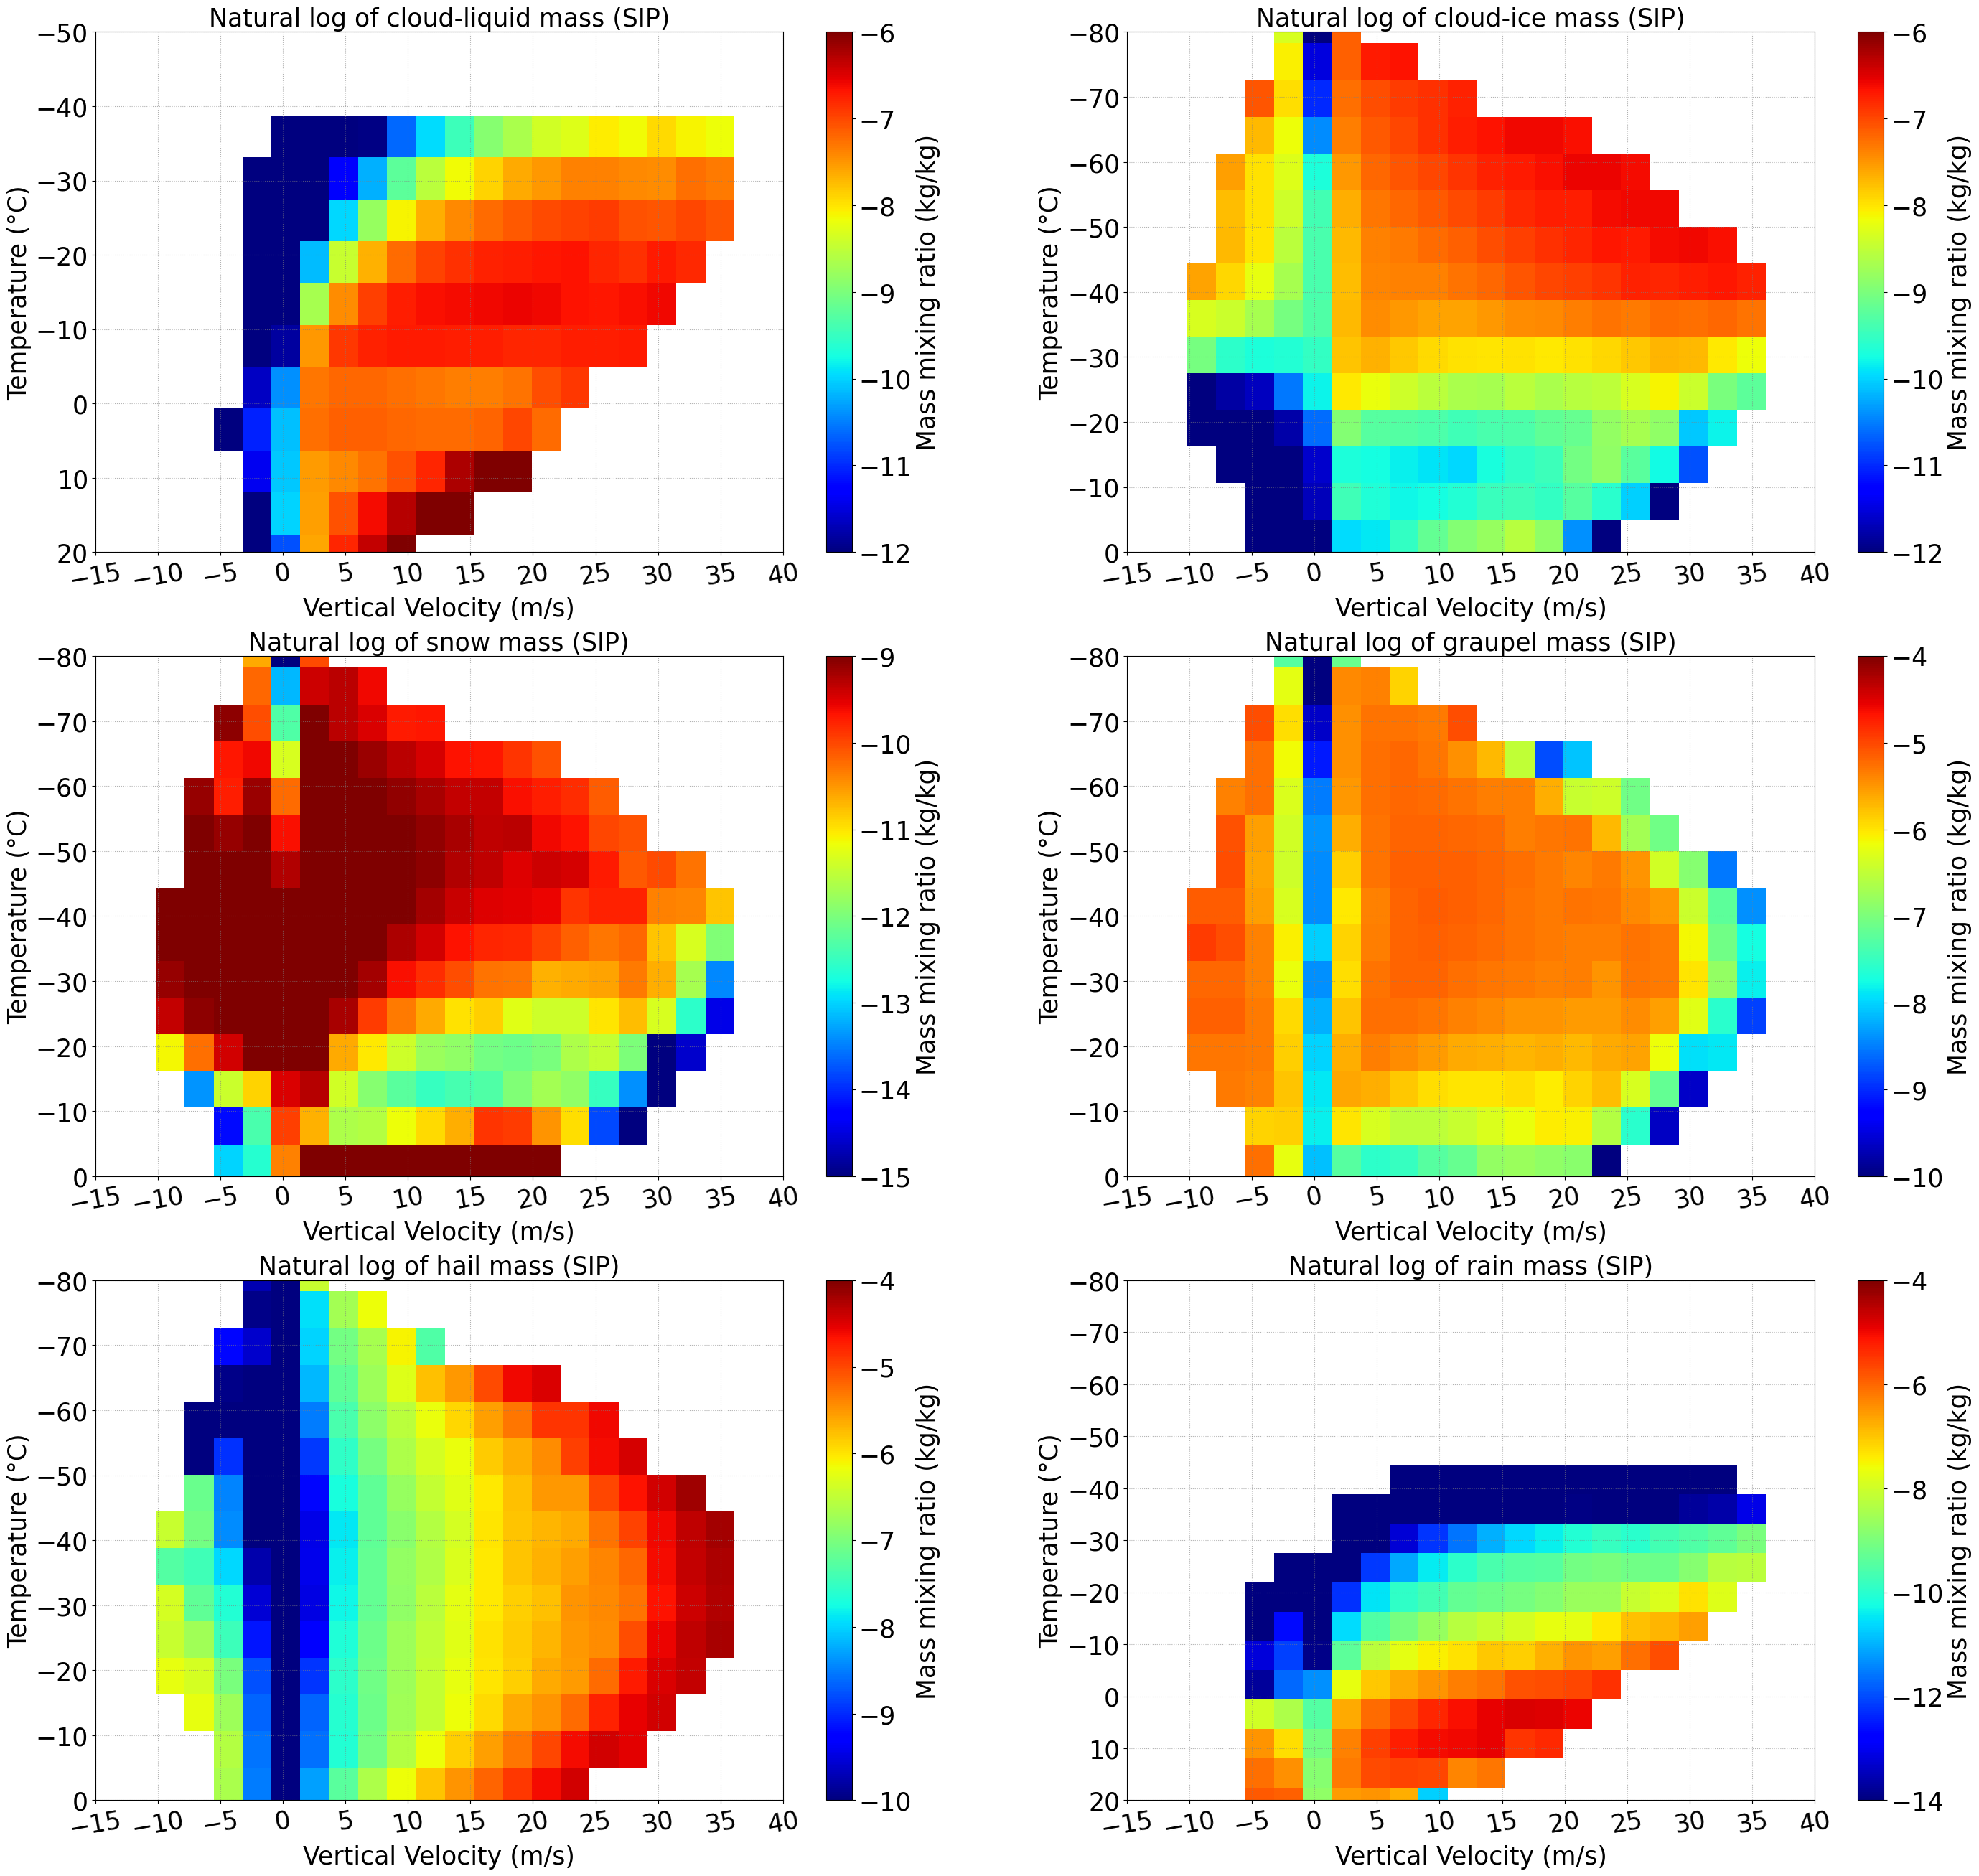

In [20]:


fontsize = 25;
rotation=10

plt.figure(figsize=(34, 32))
plt.subplot(3,2,1)
contour=plt.imshow(np.log(avg_qc_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-liquid mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(np.log(avg_qi_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-ice mass (SIP)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(np.log(avg_qs_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-15, vmax=-9, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of snow mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(np.log(avg_qg_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of graupel mass (SIP)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(np.log(avg_qh_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of hail mass (SIP)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(np.log(avg_qr_temp_w_sip), extent=[wvel_bin[0], wvel_bin[-1],temp_bin[0], temp_bin[-1]], 
                   vmin=-14, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of rain mass (SIP)', fontsize=fontsize)

plt.show()


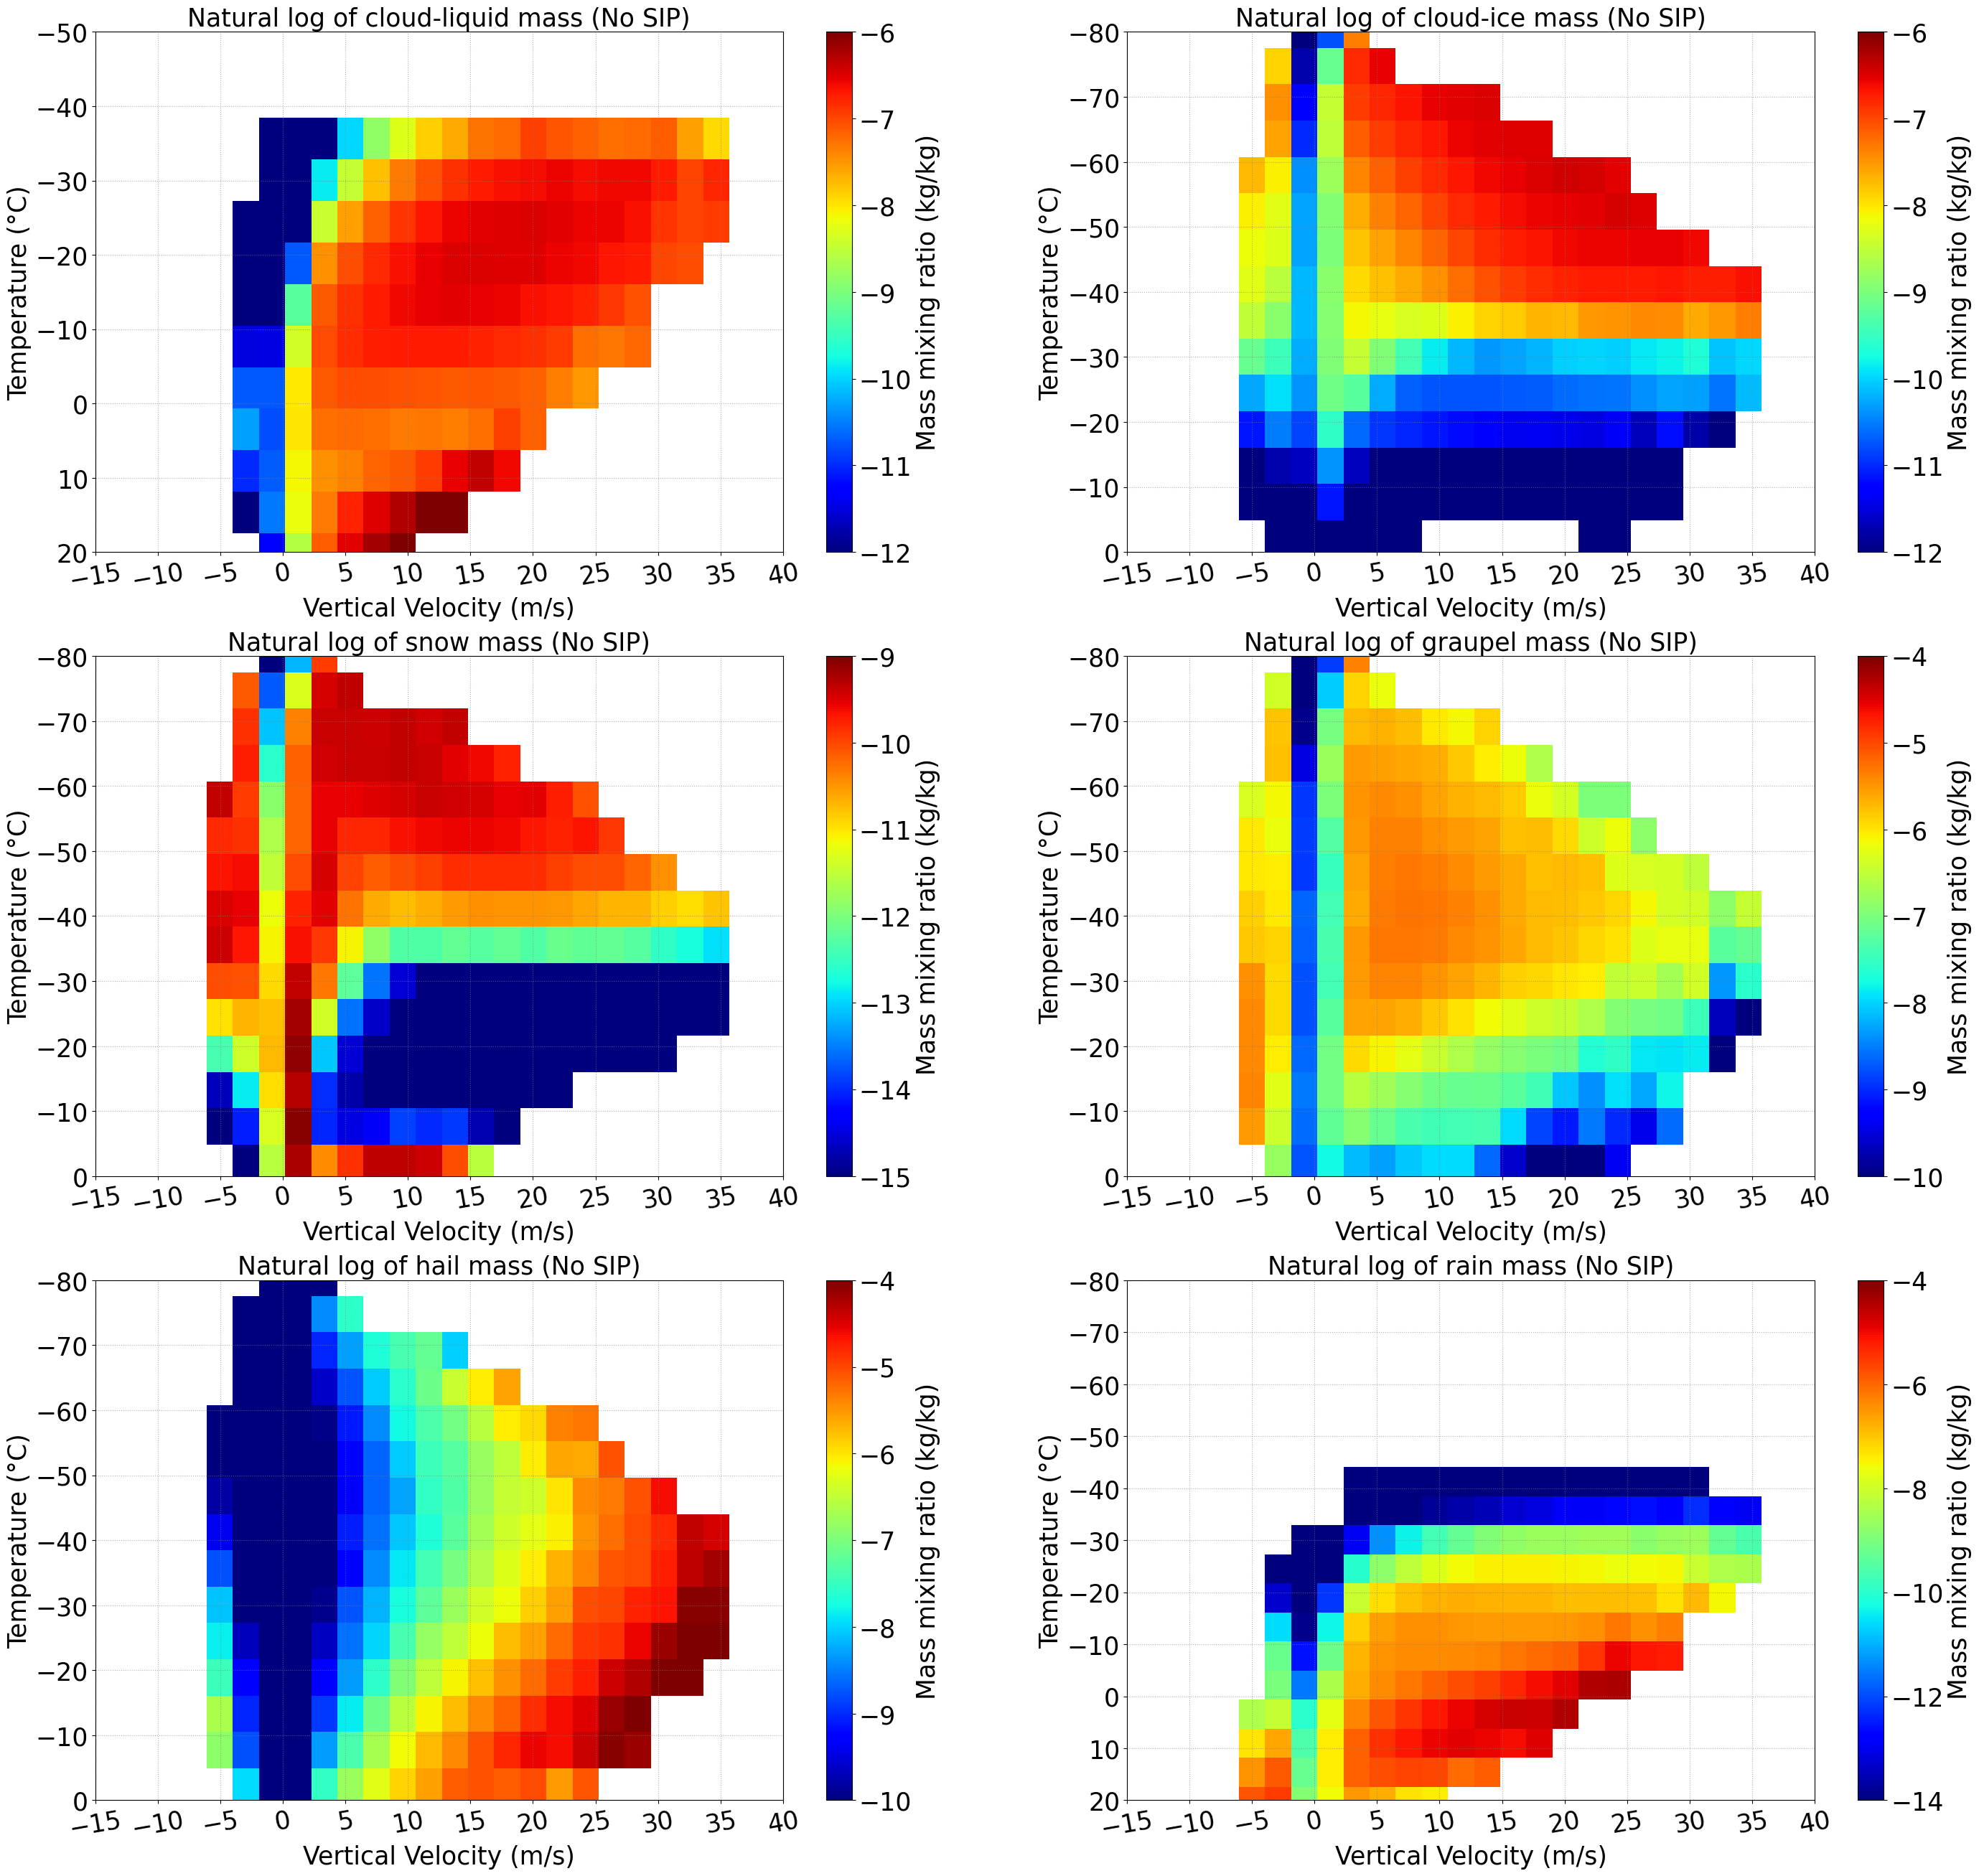

In [22]:


fontsize = 25;
rotation=10

plt.figure(figsize=(34, 32))
plt.subplot(3,2,1)
contour=plt.imshow(np.log(avg_qc_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -50)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-liquid mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,2)
contour=plt.imshow(np.log(avg_qi_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-12, vmax=-6, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of cloud-ice mass (No SIP)', fontsize=fontsize)
#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,3)
contour=plt.imshow(np.log(avg_qs_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-15, vmax=-9, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of snow mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,4)
contour=plt.imshow(np.log(avg_qg_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of graupel mass (No SIP)', fontsize=fontsize)

#plt.show()


#fontsize = 20;

#plt.figure(figsize=(25, 7))
plt.subplot(3,2,5)
contour=plt.imshow(np.log(avg_qh_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-10, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(0, -80)
plt.yticks([0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of hail mass (No SIP)', fontsize=fontsize)

plt.subplot(3,2,6)
contour=plt.imshow(np.log(avg_qr_temp_w_nosip), extent=[wvel_nosip_bin[0], wvel_nosip_bin[-1],temp_nosip_bin[0], temp_nosip_bin[-1]], 
                   vmin=-14, vmax=-4, aspect='auto', origin='lower',cmap='jet')

plt.grid(True, linestyle=':', color='grey',alpha=0.6)
plt.xlim(-15, 40)
plt.xticks([-15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=fontsize, rotation=rotation)
plt.ylim(20, -80)
plt.yticks([20, 10, 0, -10, -20, -30, -40, -50, -60, -70, -80], fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
plt.xlabel('Vertical Velocity (m/s)', fontsize=fontsize)

colorbar=plt.colorbar(label='Average mass (kg/kg)')
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.set_label(label='Mass mixing ratio (kg/kg)', size=fontsize)

plt.title('Natural log of rain mass (No SIP)', fontsize=fontsize)

plt.show()


In [315]:
#### CFAD plots


tempc = ds_sip['tempc'];
ht_km = 1.e-3 * ds_sip['z_mc'];
tempc_avg = tempc.mean(dim=('time', 'ncells'));
ht_avg = ht_km.mean(dim=('time','ncells'));

lwc_sip = ds_sip['lwc_gperm3'];
lwc_sip_filt = xr.where(ds_sip.lwc_gperm3 > 0., ds_sip.lwc_gperm3, np.nan);

lwc_sip_bins = np.linspace(lwc_sip_filt.min().values, lwc_sip_filt.max().values, 20);
cfad_lwc_sip = np.zeros((len(lwc_sip_bins) - 1, len(ht_avg)));
lwc_sip_values = lwc_sip_filt.values;

for i in range(len(lwc_sip_bins) - 1):
    mask = (lwc_sip_values >= lwc_sip_bins[i]) & (lwc_sip_values < lwc_sip_bins[i + 1])    
    cfad_lwc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)


In [316]:

tiwc_sip = ds_sip['tiwc_gperm3'];
tiwc_sip_filt = xr.where(ds_sip.tiwc_gperm3 > 0., ds_sip.tiwc_gperm3, np.nan);

tiwc_sip_bins = np.linspace(tiwc_sip_filt.min().values, tiwc_sip_filt.max().values, 20);
cfad_tiwc_sip = np.zeros((len(tiwc_sip_bins) - 1, len(ht_avg)));
tiwc_sip_values = tiwc_sip_filt.values;

for i in range(len(tiwc_sip_bins) - 1):
    mask = (tiwc_sip_values >= tiwc_sip_bins[i]) & (tiwc_sip_values < tiwc_sip_bins[i + 1])    
    cfad_tiwc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)



In [331]:
print(ds_sip.cdnc_percm3.min().values)
print(ds_sip.cdnc_percm3.max().values)

0.0
269.1216


In [336]:
print(cdnc_sip_bins)

[  0.          14.1642954   28.32859079  42.49288619  56.65718159
  70.82147699  84.98577238  99.15006778 113.31436318 127.47865858
 141.64295397 155.80724937 169.97154477 184.13584016 198.30013556
 212.46443096 226.62872636 240.79302175 254.95731715 269.12161255]


In [350]:

tempc = ds_sip['tempc'];
ht_km = 1.e-3 * ds_sip['z_mc'];
tempc_avg = tempc.mean(dim=('time', 'ncells'));
ht_avg = ht_km.mean(dim=('time','ncells'));

cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(cdnc_sip_filt.min().values, cdnc_sip_filt.max().values, 20);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = cdnc_sip_filt.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)

(30.0, -60.0)

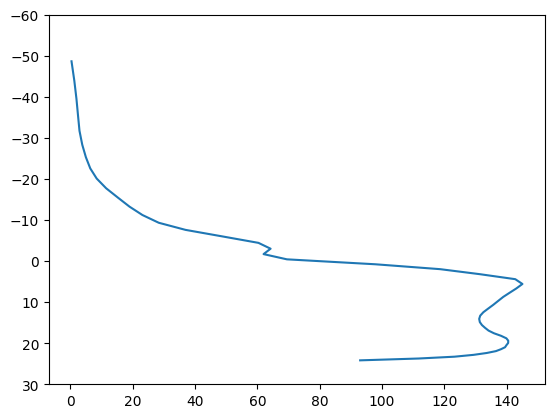

In [374]:

filt_qnc = xr.where((ds_sip.cdnc_percm3 > 0.) & (ds_sip.w_vel > 1.), ds_sip.cdnc_percm3, np.nan)

plt.plot(filt_qnc.mean(dim=('time','ncells')), ds_sip.tempc.mean(dim=('time','ncells')))
plt.ylim(30,-60)

In [352]:

cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(ds_sip.cdnc_percm3.min().values, ds_sip.cdnc_percm3.max().values, 50);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = ds_sip.cdnc_percm3.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)
    

In [361]:

tinc_sip = ds_sip.inc_perl;
tinc_sip_filt = xr.where(ds_sip.inc_perl > 0., ds_sip.inc_perl, np.nan);
tinc_sip_bins = np.linspace(tinc_sip_filt.min().values, tinc_sip_filt.max().values, 40)

cfad_tinc_sip = np.zeros((len(tinc_sip_bins) - 1, len(ht_avg)))

tinc_sip_values = tinc_sip_filt.values  # shape (time, height, ncells)

# Loop through the tinc bins
for i in range(len(tinc_sip_bins) - 1):
    # Create a mask that selects the values within the current bin range
    mask = (tinc_sip_values >= tinc_sip_bins[i]) & (tinc_sip_values < tinc_sip_bins[i + 1])
    
    # Sum the mask along the 'time' (axis=0) and 'ncells' (axis=2) dimensions, keeping the height (axis=1)
    cfad_tinc_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)

In [290]:

refl_sip = ds_sip['dbz'];
refl_sip_filt = xr.where(ds_sip.dbz > -50., ds_sip.dbz, np.nan);
refl_sip_filt_avg = refl_sip_filt.mean(dim='time');

refl_sip_bins = np.linspace(refl_sip_filt.min().values, refl_sip_filt.max().values, 50);
cfad_refl_sip = np.zeros((len(refl_sip_bins) - 1, len(ht_avg)));
refl_sip_values = refl_sip_filt.values;

for i in range(len(refl_sip_bins) - 1):
    mask = (refl_sip_values >= refl_sip_bins[i]) & (refl_sip_values < refl_sip_bins[i + 1])    
    cfad_refl_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)



In [309]:

wvel_sip = ds_sip['w_vel'];
wvel_sip_filt = xr.where(np.abs(ds_sip.w_vel) < 60., ds_sip.w_vel, np.nan);

wvel_sip_bins = np.linspace(wvel_sip_filt.min().values, wvel_sip_filt.max().values, 10);
cfad_wvel_sip = np.zeros((len(wvel_sip_bins) - 1, len(ht_avg)));
wvel_sip_values = wvel_sip_filt.values;

for i in range(len(wvel_sip_bins) - 1):
    mask = (wvel_sip_values >= wvel_sip_bins[i]) & (wvel_sip_values <= wvel_sip_bins[i + 1])    
    cfad_wvel_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)



In [305]:
print(wvel_sip_bins)

[-10.18049526  -5.0421185    0.09625827   5.23463504  10.3730118
  15.51138857  20.64976533  25.7881421   30.92651886  36.06489563]


In [302]:
print(wvel_sip_bins)

[-10.18049526  -5.55595617  -0.93141708   3.69312201   8.31766109
  12.94220018  17.56673927  22.19127836  26.81581745  31.44035654
  36.06489563]


In [379]:
print(ht_avg.values)

[2.0700926e+01 1.8707630e+01 1.7459837e+01 1.6432219e+01 1.5538088e+01
 1.4738070e+01 1.4009794e+01 1.3338899e+01 1.2715508e+01 1.2132399e+01
 1.1584106e+01 1.1066360e+01 1.0575746e+01 1.0109476e+01 9.6652365e+00
 9.2410746e+00 8.8353434e+00 8.4466105e+00 8.0736399e+00 7.7153478e+00
 7.3707871e+00 7.0391073e+00 6.7195578e+00 6.4114618e+00 6.1142201e+00
 5.8272796e+00 5.5501485e+00 5.2823749e+00 5.0235476e+00 4.7732930e+00
 4.5312686e+00 4.2971573e+00 4.0706716e+00 3.8515470e+00 3.6395345e+00
 3.4344137e+00 3.2359767e+00 3.0440290e+00 2.8583987e+00 2.6789262e+00
 2.5054605e+00 2.3378699e+00 2.1760328e+00 2.0198364e+00 1.8691847e+00
 1.7239914e+00 1.5841790e+00 1.4496853e+00 1.3204583e+00 1.1964580e+00
 1.0776585e+00 9.6404749e-01 8.5562992e-01 7.5242615e-01 6.5447932e-01
 5.6185573e-01 4.7465226e-01 3.9300293e-01 3.1709218e-01 2.4717167e-01
 1.8359199e-01 1.2685774e-01 7.7744730e-02 3.7606236e-02 1.0000001e-02]


In [384]:


cdnc_sip = ds_sip['cdnc_percm3'];
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan);

cdnc_sip_bins = np.linspace(cdnc_sip.min().values, cdnc_sip.max().values, 5);
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)));
cdnc_sip_values = cdnc_sip.values;

for i in range(len(cdnc_sip_bins) - 1):
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])    
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0,2)) / len(ds_sip.time)
    

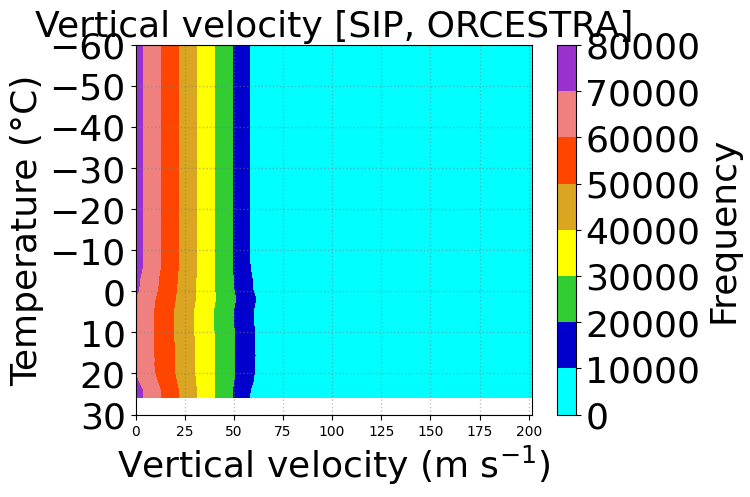

In [386]:

contour = plt.contourf(cdnc_sip_bins[:-1], tempc_avg, cfad_cdnc_sip.T,  cmap=cmap)  
#plt.xlim(-10, 5)
#plt.xticks([-3, -2, -1, 0., 1, 2, 3], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


In [ ]:

plt.plot(ds_nosip.cdnc_percm3.mean(dim=('time','ncells')), ds_nosip.tempc.mean(dim=('time','ncells')))
plt.ylim(30,-60)

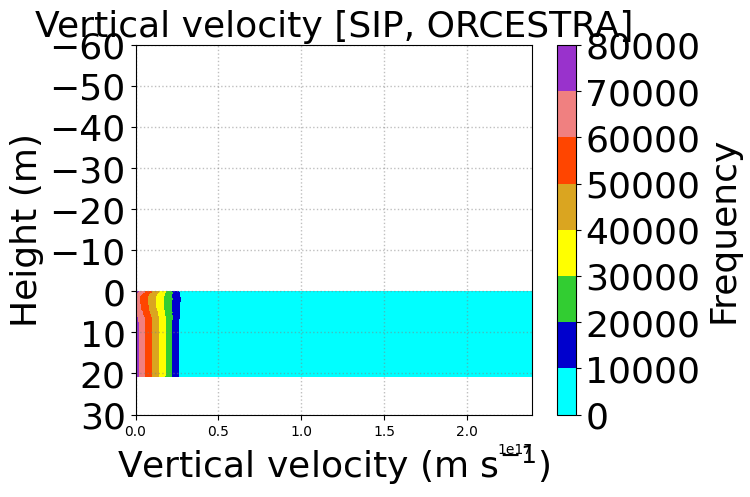

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

cdnc_sip = ds_sip['cdnc_percm3']
cdnc_sip_filt = xr.where(ds_sip.cdnc_percm3 > 0., ds_sip.cdnc_percm3, np.nan)

# Create bins for cdnc_sip
cdnc_sip_bins = np.linspace(ds_sip.cdnc_percm3.min().values, ds_sip.cdnc_percm3.max().values, 10)
cfad_cdnc_sip = np.zeros((len(cdnc_sip_bins) - 1, len(ht_avg)))

# Convert to numpy for easier manipulation
cdnc_sip_values = ds_sip.cdnc_percm3.values

# Loop through each bin of CDNC
for i in range(len(cdnc_sip_bins) - 1):
    # Create a mask for CDNC values within the current bin
    mask = (cdnc_sip_values >= cdnc_sip_bins[i]) & (cdnc_sip_values < cdnc_sip_bins[i + 1])
    
    # Sum over the time and ncells axes for each height, and normalize by time length
    cfad_cdnc_sip[i, :] = np.sum(mask, axis=(0, 2)) / len(ds_sip.time)

# Create the plot
contour = plt.contourf(cdnc_sip_bins[:-1], ht_avg, cfad_cdnc_sip.T, cmap=cmap)
plt.ylim(30, -60.)  # adjust y-axis limits
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Height (m)', fontsize=fontsize)  # Assuming you want 'Height' on the y-axis
cbar = plt.colorbar(contour, label='Frequency', orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

# Show the plot
plt.show()


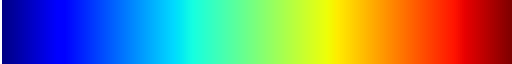

In [123]:
cmap_new

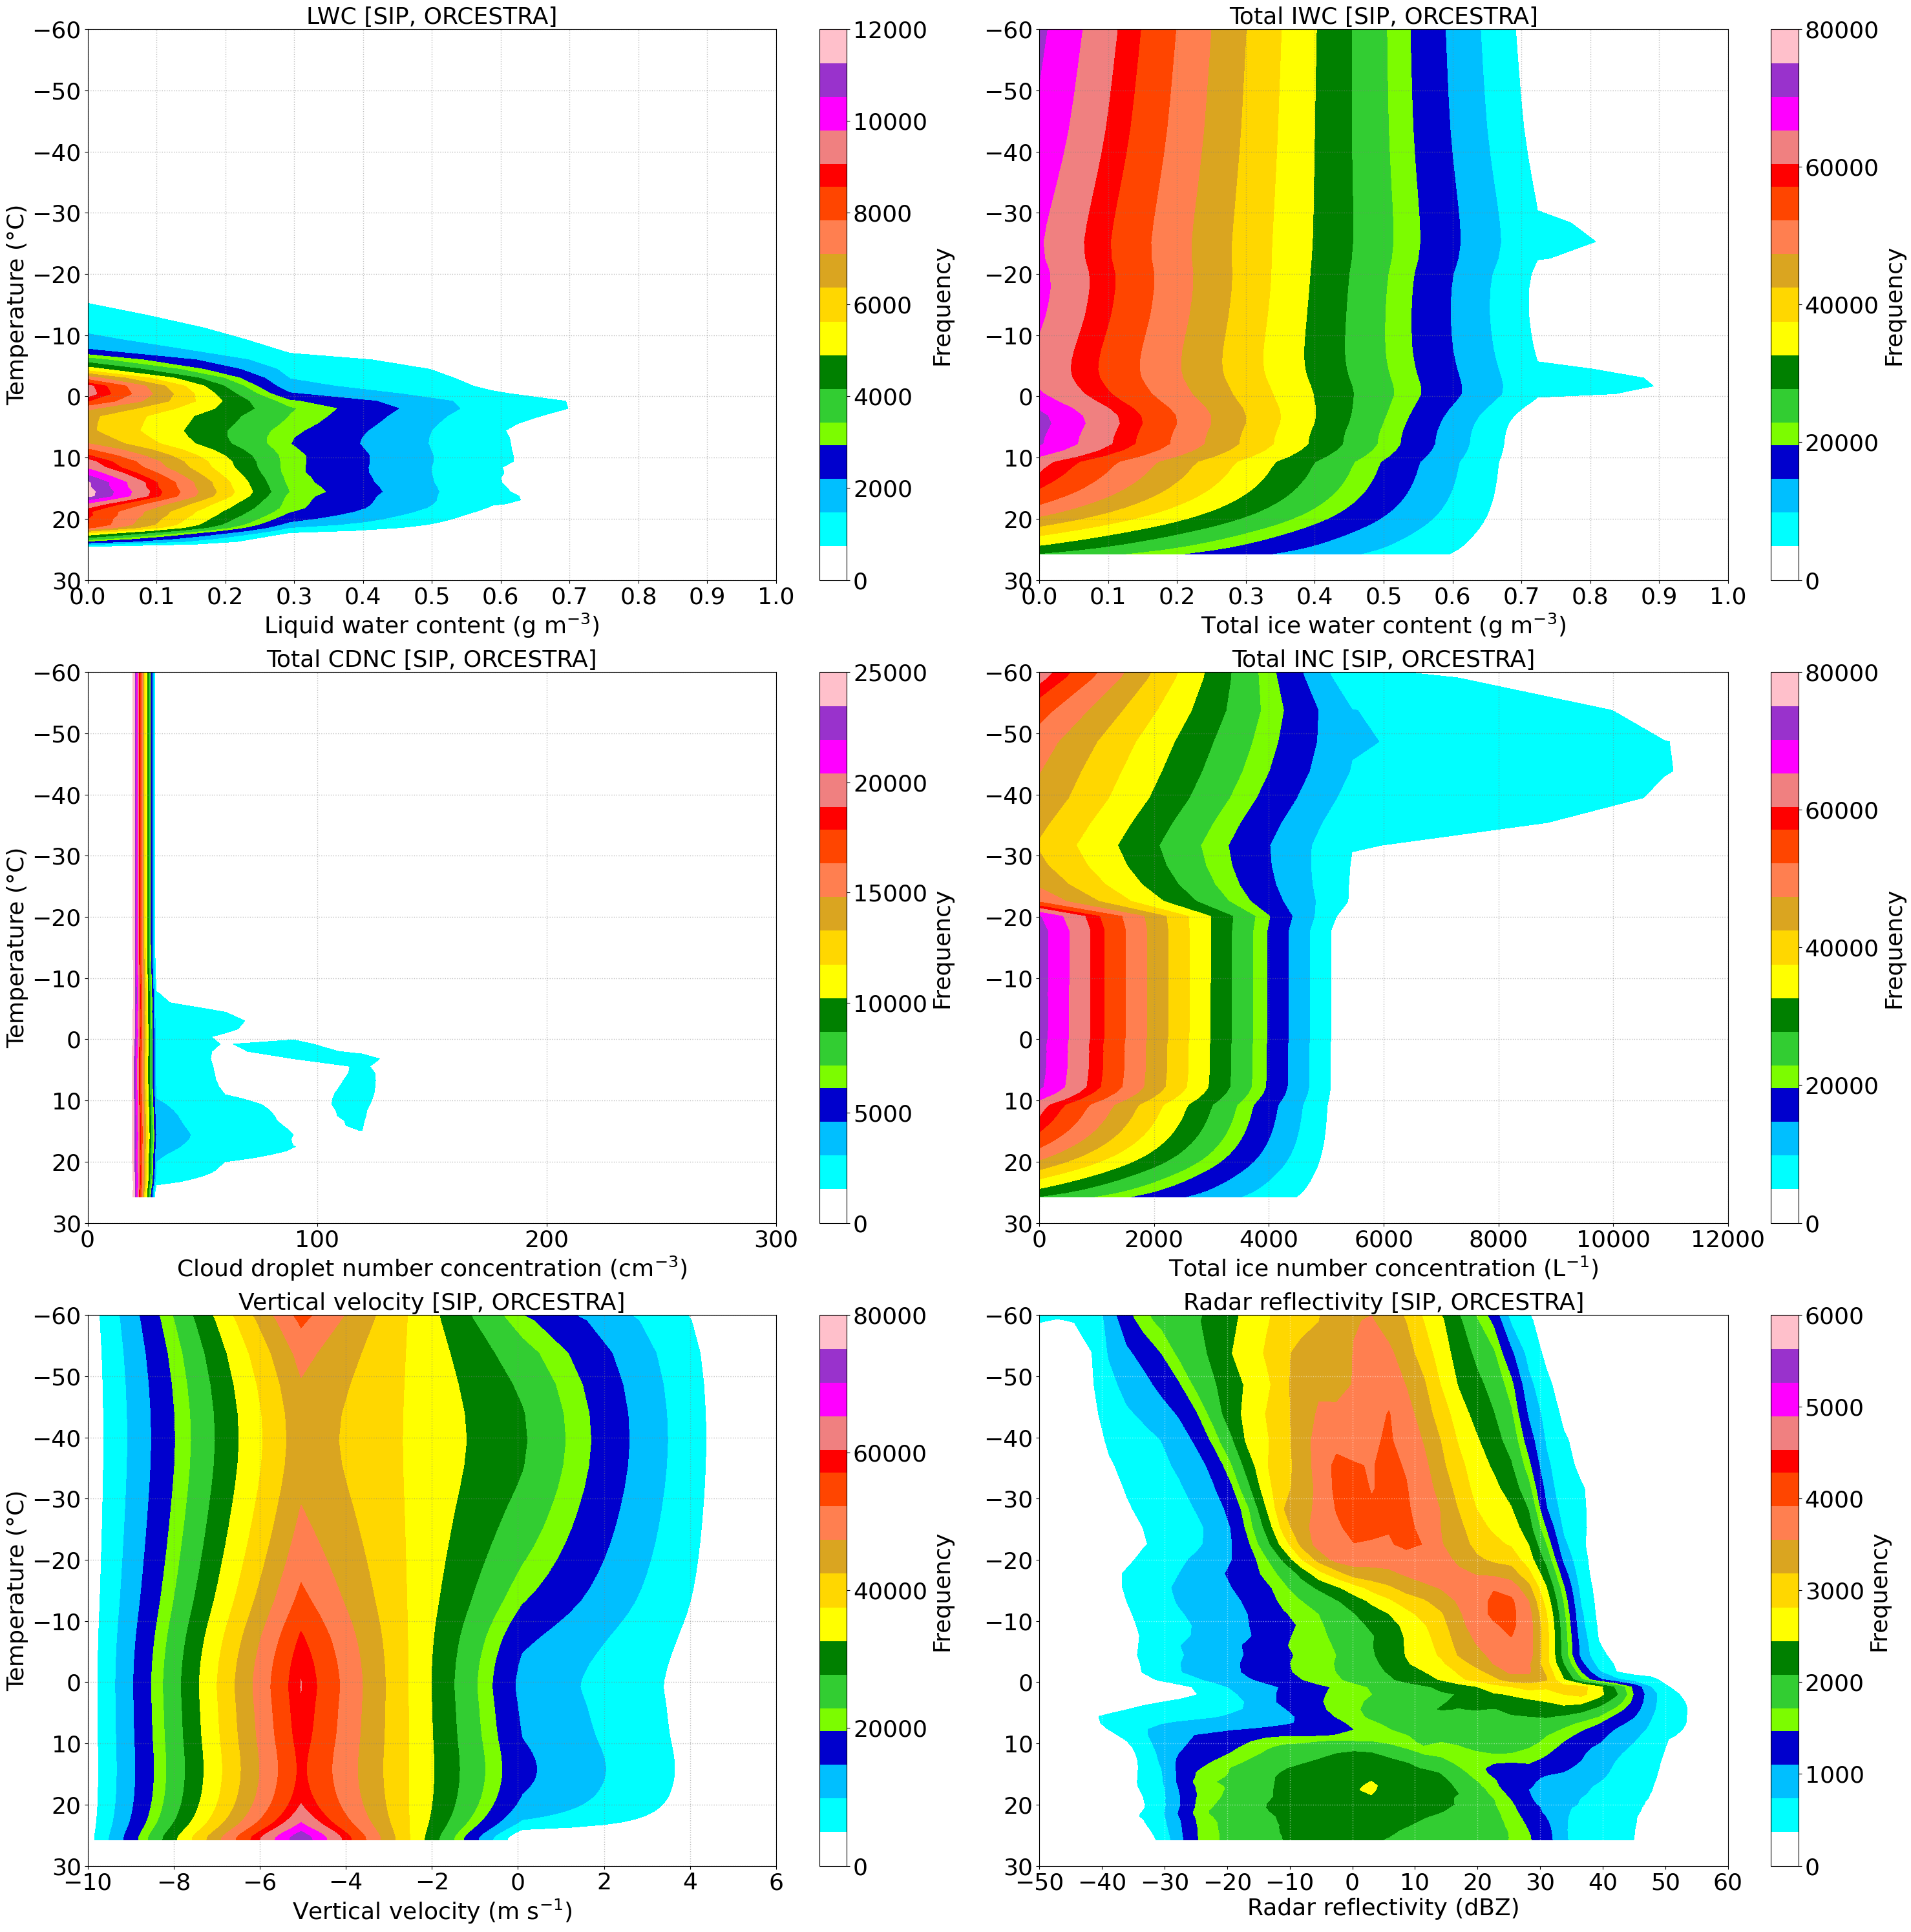

In [364]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#cmap = plt.cm.jet
#cmap_new = mcolors.ListedColormap(['white'] + [cmap(i) for i in range(1, cmap.N)])

fontsize = 26.;
linewidth = 1.
rotation=0
#cmap = mcolors.ListedColormap(['white', 'blue', 'green', 'yellow', 'red', 'purple'])
lev_lwc = np.linspace(0., 12000, 50)
lev_tiwc = np.linspace(0., 80000, 50)
lev_cdnc = np.linspace(0., 25000, 50)
lev_tinc = np.linspace(0., 80000, 50)
lev_wvel = np.linspace(0., 80000, 50)
lev_refl = np.linspace(0., 6000, 50)

#cfad[cfad < 0.0005]=np.nan

colors = ['white', 'cyan', 'deepskyblue', 'mediumblue', 'lawngreen', 'limegreen', 'green', 'yellow', 'gold', 'goldenrod', 
          'coral', 'orangered', 'red', 'lightcoral', 'magenta', 'darkorchid', 'pink']

cmap = ListedColormap(colors)

plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
contour = plt.contourf(lwc_sip_bins[:-1], tempc_avg, cfad_lwc_sip.T, vmin=0, vmax=12000, levels=lev_lwc, cmap=cmap)  
#plt.xscale('log')
#plt.xlim(1.e-3, 1.e0)
#plt.xticks([1.e-3, 1.e-2, 1.e-1, 1.e0], fontsize=fontsize)
plt.xlim(0, 1.)
plt.xticks([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fontsize)

plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Liquid water content (g m$^{-3}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 2000, 4000, 6000, 8000, 10000, 12000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('LWC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 2)
contour = plt.contourf(tiwc_sip_bins[:-1], tempc_avg, cfad_tiwc_sip.T, vmin=0, vmax=80000, levels=lev_tiwc, cmap=cmap)  
plt.xlim(0, 1.)
plt.xticks([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Total ice water content (g m$^{-3}$)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total IWC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 3)
contour = plt.contourf(cdnc_sip_bins[:-1], tempc_avg, cfad_cdnc_sip.T, vmin=0, vmax=25000, levels=lev_cdnc, cmap=cmap)  
#plt.xscale('log')
plt.xlim(0., 300)
plt.xticks([0, 100, 200, 300], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Cloud droplet number concentration (cm$^{-3}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 5000, 10000, 15000, 20000, 25000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total CDNC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


plt.subplot(3, 2, 4)
contour = plt.contourf(tinc_sip_bins[:-1], tempc_avg, cfad_tinc_sip.T, vmin=0, vmax=80000, levels=lev_tinc, cmap=cmap)  
#plt.xscale('log')
#plt.xlim(1.e-12, 1.e4)
plt.xlim(0., 12000)
plt.xticks([0, 2.e3, 4.e3, 6.e3, 8.e3, 1.e4, 1.2e4], fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Total ice number concentration (L$^{-1}$)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Total INC [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)


plt.subplot(3, 2, 5)
contour = plt.contourf(wvel_sip_bins[:-1], tempc_avg, cfad_wvel_sip.T, vmin=0., vmax=80000, levels=lev_wvel, cmap=cmap)  
plt.xlim(-10, 6)
plt.xticks([-10, -8, -6, -4, -2, 0., 2, 4, 6], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Vertical velocity (m s$^{-1}$)', fontsize=fontsize)
plt.ylabel('Temperature (°C)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 20000, 40000, 60000, 80000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Vertical velocity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='grey', linewidth=linewidth, alpha=0.5)

plt.subplot(3, 2, 6)
contour = plt.contourf(refl_sip_bins[:-1], tempc_avg, cfad_refl_sip.T, vmin=0, vmax=6000, levels=lev_refl, cmap=cmap)  
plt.xlim(-50, 60)
plt.xticks([-50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60], rotation=rotation, fontsize=fontsize)
plt.ylim(30, -60.)
plt.yticks([30., 20., 10., 0., -10., -20., -30., -40., -50., -60.], fontsize=fontsize)
#plt.ylim(0, 16.)
#plt.yticks([0., 2., 4., 6., 8., 10., 12., 14., 16.], fontsize=fontsize)
plt.xlabel('Radar reflectivity (dBZ)', fontsize=fontsize)
#plt.ylabel('Height (km)', fontsize=fontsize)
cbar = plt.colorbar(contour, label='Frequency', ticks=[0., 1000, 2000, 3000, 4000, 5000, 6000], orientation='vertical')
cbar.set_label('Frequency', fontsize=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
plt.title('Radar reflectivity [SIP, ORCESTRA]', fontsize=fontsize)
plt.grid(True, linestyle=':', color='white', linewidth=linewidth, alpha=0.5)
plt.tight_layout()
plt.show()